# k-NN算法

## 先导入相关库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
from sklearn.neighbors import KNeighborsClassifier    #导入k-NN算法包
from sklearn.datasets import load_breast_cancer  # 乳腺癌数据集，做二分类的数据集
from sklearn.model_selection import train_test_split  #用于划分数据集
from sklearn.model_selection import cross_val_score as CVS  #导入交叉验证函数
from sklearn.preprocessing import MinMaxScaler as mms  #导入归一化处理函数

## 完整代码

0.9210526315789473

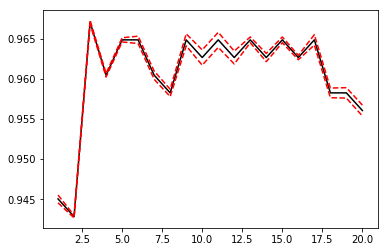

In [15]:
#获取样本数据——X特征数据和y标签数据
cancer_data=load_breast_cancer()
X=cancer_data.data
Y=cancer_data.target  # 0 是良性，1 是恶性
#划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0) #随机抽取数据

#对划分后的数据集做归一化处理(消除量纲影响)
MMS=mms().fit(Xtrain)
MMS_1=mms().fit(Xtest)
X_train=MMS.transform(Xtrain)
X_test=MMS_1.transform(Xtest)

#使用交叉验证、学习曲线或加入距离权重寻找出K值
score=[]
var_=[]
std_=[]
krange=range(1,21)
#寻找最佳的k值
for i in krange:
    #对于数据存在大量异常值时可以加入weights='distance'，weights是选择性的，一般用于模型调优使用
    clf=KNeighborsClassifier(n_neighbors=i)
    #进行交叉验证，用训练集数据重新分组
    cvsresult=CVS(clf,X_train,Ytrain,cv=5) #默认cv=3，根据经验定这个值，一般是5或10(10万以上的数据)，不宜过小
    score.append(cvsresult.mean())
    var_.append(cvsresult.var())
    std_.append(cvsresult.std())
    
#画图对比
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_),color='r',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_),color='r',linestyle='--')

#求最佳K
best_k=score.index(max(score))+1

# 测试模型效果
clf=KNeighborsClassifier(n_neighbors=best_k)  #实例化
clf_model=clf.fit(X_train,Ytrain)             #建模型
score=clf_model.score(X_test,Ytest)           #用测试数据评估模型
score

In [8]:
#数据集各特征英文翻译
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数'] #名称转换为中文，方便理解

# 决策树

## 先导入库

In [2]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_wine                 #导入红酒数据集
from sklearn.model_selection import train_test_split   #导入划分数据集函数
from sklearn.tree import DecisionTreeClassifier        #导入sklearn决策树函数
import matplotlib.pyplot as plt                        #导入画图工具
import matplotlib as mpl
import graphviz                                        #导入画决策树工具
from sklearn import tree                               #导入决策树库

## 画图中文乱码问题解决方案

In [3]:
plt.rcParams['font.sans-serif']=['SimHei']              #显示中文
plt.rcParams['axes.unicode_minus']=False                #显示负号

## 完整代码

第一次无参建模的效果 0.9444444444444444
交叉验证模型的均值0.9108940914158306和方差0.0009665140658381902
不同max_depth值的交叉验证模型效果 0.9188940914158306


D:\tool\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


模型优化后的效果: 0.9259259259259259


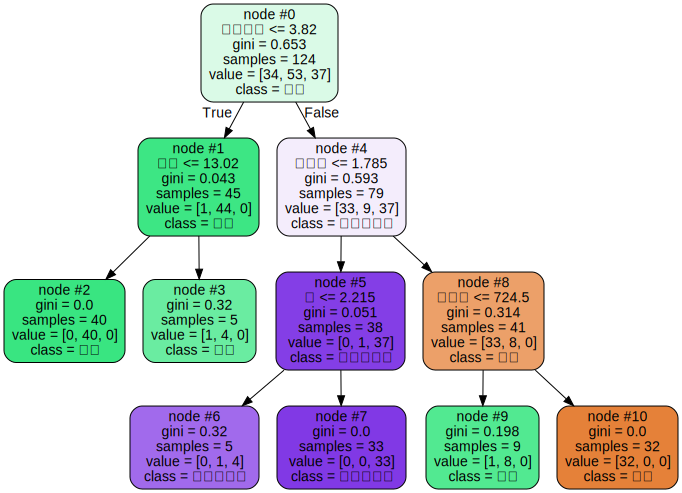

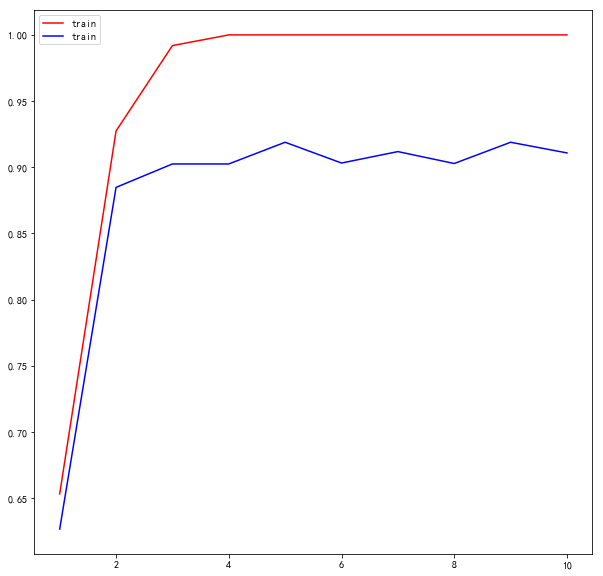

In [63]:
#获取数据集数据
wine_data=load_wine()
#random_state设置随机数种子，避免过拟合现象；也可以在DecisionTreeClassifier()时设置random_state和splitter两个随机参数
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine_data.data,wine_data.target,
                                           test_size=0.3,random_state=420)     

#导⼊模型，粗略跑一下查看结果
clf=DecisionTreeClassifier()       #实例化                   
clf_model=clf.fit(Xtrain,Ytrain)   #训练模型
score_1=clf.score(Xtest,Ytest)     #用测试数据评估模型效果
print('第一次无参建模的效果',score_1)   

#使用交叉验证方法，用评分的均值来评判模型效果，避免过拟合现象。
#需要导入cross_val_score方法
from sklearn.model_selection import cross_val_score

score_cross=cross_val_score(clf_model,Xtrain,Ytrain,cv=5).mean()  #cv代表计算多少次，分割次数
var_cross=cross_val_score(clf_model,Xtrain,Ytrain,cv=5).var()
print('交叉验证模型的均值{}和方差{}'.format(score_cross,var_cross))

fig,ax=plt.subplots(1,1,figsize=(10,10))

# 选择max_depth参数，观测其不同值下模型的拟合状况
tr=[]
te=[]
for i in range(1,11):
    clf=DecisionTreeClassifier(max_depth=i)
    clf=clf.fit(Xtrain,Ytrain)
    s_tr=clf.score(Xtrain,Ytrain)  #比较训练集的拟合能力和交叉验证后的拟合效果
    s_te=cross_val_score(clf,Xtrain,Ytrain,cv=5).mean()
    tr.append(s_tr)
    te.append(s_te)
print('不同max_depth值的交叉验证模型效果',max(te))

ax.plot(range(1,11),tr,color='red',label='train')
ax.plot(range(1,11),te,color='blue',label='test')
ax.legend()

#采用网格搜索调整参数
# 1、先导入网格搜索方法
from sklearn.model_selection import GridSearchCV

# 2、设置要调整的参数，字典形式
# Criterion这个参数是用来决定不纯度的计算方法
# max_depth、min_samples_leaf、min_samples_split、min_impurity_decrease 都是剪枝参数
parameters={'criterion':['gini','entropy'],
           'max_depth':[*range(1,11)],
           'min_samples_leaf':[*range(1,11)],
           'min_samples_split':range(2,20,2),
           'min_impurity_decrease':np.linspace(0,0.5,20)}

# 3、设置参数网格,即实例化
#cv=5是设置交叉验证
reg=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,cv=5)

# 4、建模
reg.fit(Xtrain,Ytrain)

# 5、获取最优参数数据
best_parameters=reg.best_params_

# 6、优化模型

best_clf=DecisionTreeClassifier(criterion=best_parameters['criterion'],max_depth=best_parameters['max_depth'],
                               min_samples_leaf=best_parameters['min_samples_leaf'],min_samples_split=best_parameters['min_samples_split'],
                               min_impurity_decrease=best_parameters['min_impurity_decrease'])
best_clf_model=best_clf.fit(Xtrain,Ytrain)
best_score=best_clf_model.score(Xtest,Ytest)


print('模型优化后的效果:',best_score)

# 查看重要性特征
#clf_model.feature_importances_

# 用graphviz第三方包画决策树图
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

# 导出树结构
#filled=True,rounded=True 用来给节点填充颜色
dot_data=tree.export_graphviz(best_clf_model,feature_names=feature_name,
                              class_names=["琴酒","雪莉","⻉尔摩德"],
                             filled=True,rounded=True,
                             node_ids=True)
graph=graphviz.Source(dot_data)
graph

## ID3算法生成决策树手工代码

### 第一步，定义熵函数

In [1]:
def calEnt(dataset):
    n=dataset.shape[0] #样本总体数
    i=dataset.iloc[:,-1].value_counts()
    p=i/n
    ent=(-p*np.log2(p)).sum()
    return ent

### 第二步，选择最优的列进行切分——用信息增益判断

In [10]:
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                # 计算原始熵
    bestGain = 0                                             # 初始化信息增益
    axis = -1                                                # 初始化最佳切分列，标签列
    for i in range(dataSet.shape[1]-1):                      # 对特征的每一列进行循环
        levels= dataSet.iloc[:,i].value_counts().index       # 提取出当前列的所有取值
        ents = 0                                             # 初始化子节点的信息熵
        for j in levels:                                     # 对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         # 某一个子节点的dataframe
            ent = calEnt(childSet)                           # 计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent # 计算当前列的信息熵
            #print(f'第{i}列的信息熵为{ents}')
        infoGain = baseEnt-ents                              # 计算当前列的信息增益
        #print(f'第{i}列的信息增益为{infoGain}')
        if (infoGain > bestGain):
            bestGain = infoGain                              # 选择最大信息增益
            axis = i                                         # 最大信息增益所在列的索引
    return axis

### 第二步，定义划分数据集函数，并求出最优的数据集

In [8]:
def mySplit(dataSet,axis,value):
    col=dataSet.columns[axis]
    redataSet =dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet

### 使用算法生成树

In [40]:
def createTree(dataSet):
    featlist = list(dataSet.columns)                        # 提取出数据集所有的列
    print(featlist)
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签
    print(classlist)
    # 判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    #classlist[0]==dataSet.shape[0] 满足递归条件‘当前结点包含的样本集合为空，不能划分’
    #dataSet.shape[1] == 1 满足递归条件‘程序遍历完所有划分数据集的属性’
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        print('---------')
        print(classlist.index[0])
        return classlist.index[0]                           # 如果是，返回类标签
    
    axis = bestSplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    print('*********')
    print(myTree)
    del featlist[axis]                                      # 删除当前特征
    #满足条件‘每个分⽀下的所有实例都具有相同的分类’
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    print('-+-+-+-+-+-+-+-+-+-+')
    print(valuelist)
    for value in valuelist:                                 # 对每一个属性值递归建树
        print('>>>>>>>>>>>>>>>>>>>>')
        print('value',value,'axis',axis)
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))       
        print('myTree',myTree)
        print('>>>>>>>>>>>>>>>>>>>>')
    print('==================')
    print(myTree)
    return myTree    

### 用数据检验算法是否成功

In [41]:
row_data = {'accompany':[0,0,0,1,1],
'game':[1,1,0,1,1],
'bad_boy':['yes','yes','no','no','no']}

data=pd.DataFrame(row_data)
createTree(data)

['accompany', 'game', 'bad_boy']
no     3
yes    2
Name: bad_boy, dtype: int64
*********
{'accompany': {}}
-+-+-+-+-+-+-+-+-+-+
{0, 1}
>>>>>>>>>>>>>>>>>>>>
value 0 axis 0
['game', 'bad_boy']
yes    2
no     1
Name: bad_boy, dtype: int64
*********
{'game': {}}
-+-+-+-+-+-+-+-+-+-+
{0, 1}
>>>>>>>>>>>>>>>>>>>>
value 0 axis 0
['bad_boy']
no    1
Name: bad_boy, dtype: int64
---------
no
myTree {'game': {0: 'no'}}
>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>
value 1 axis 0
['bad_boy']
yes    2
Name: bad_boy, dtype: int64
---------
yes
myTree {'game': {0: 'no', 1: 'yes'}}
>>>>>>>>>>>>>>>>>>>>
{'game': {0: 'no', 1: 'yes'}}
myTree {'accompany': {0: {'game': {0: 'no', 1: 'yes'}}}}
>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>
value 1 axis 0
['game', 'bad_boy']
no    2
Name: bad_boy, dtype: int64
---------
no
myTree {'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}
>>>>>>>>>>>>>>>>>>>>
{'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}


{'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}

# 朴素贝叶斯算法

## 四类朴素贝叶斯算法简介
- GaussianNB：高斯朴素贝叶斯算法方法,一般用于连续数据(即服从正态分布)建模
- MultinomialNB：多项式朴素贝叶斯算法方法，一般用于离散数据或稀疏矩阵建模
- BernoulliNB：伯努利朴素贝叶斯算法方法，只能用于稀疏矩阵建模
- ComplementNB：补集朴素贝叶斯算法方法，一种新兴贝叶斯算法，修正了包括无法处理样本不平衡在内的传统朴素贝叶斯的众多缺点
- 非高斯算法，需要对连续型数据做归一化处理或分箱处理；伯努利算法还要对多类别数据做二值化处理即模型实例化时设置binarize=0.5

## 导入包和数据

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB   #导入高斯/多项式/伯努利/补集算法实例化方法
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,roc_auc_score as AUC     #导入评分方法
from sklearn.preprocessing import KBinsDiscretizer                #分箱处理方法
from sklearn.datasets import make_blobs                           #导入多类单标签数据集
from time import time

In [44]:
class_1=50000                           #多数类为50000个样本
class_2=500                             #少数类为500个样本
centers=[[0.0,0.0],[5.0,5.0]]           #设定两个类别的中心
clusters_std=[3,1]                      #设定两个类别的方差
X,y=make_blobs(n_samples=[class_1,class_2],
              centers=centers,
              cluster_std=clusters_std,
              random_state=0,shuffle=False)
X.shape
np.unique(y)

array([0, 1])

## 建模并比较

In [55]:
name=['GaussianNB','MultinomialNB','BernoulliNB','ComplementNB']
models=[GaussianNB(),MultinomialNB(),BernoulliNB(),ComplementNB()]

for name,clf in zip(name,models):
    times=time()
    #划分数据集
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,
                                           test_size=0.3,random_state=420)
    # 连续数据做分箱处理
    if name!='GaussianNB': #高斯算法不需要进行分箱处理
        kbs=KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)   #onehot:零一转换
        Xtrain=kbs.transform(Xtrain)
        Xtest=kbs.transform(Xtest)
    
    #建模
    clf.fit(Xtrain,Ytrain)
    y_pred=clf.predict(Xtest)
    proba=clf.predict_proba(Xtest)[:,1]
    score=clf.score(Xtest,Ytest)
    print(name)
    print('\tAccuracy:{:.3f}'.format(score))
    print('\tRecall:{:.3f}'.format(recall_score(Ytest,y_pred)))
    print('\tAUC:{:.3f}'.format(AUC(Ytest,proba)))
    print('模型建立耗时(秒)：',datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))
    
#可以使用np.exp来查看真正的概率值
#np.exp(clf.class_log_prior_)
#返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
#mnb.feature_log_prob_
#用混淆矩阵查看效果
#metrics.confusion_matrix(Ytest,y_pred) 主对角线的值越大说明预测准确性越大

GaussianNB
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
模型建立耗时(秒)： 00:00:018923
MultinomialNB
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
模型建立耗时(秒)： 00:00:033976
BernoulliNB
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
模型建立耗时(秒)： 00:00:028897
ComplementNB
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
模型建立耗时(秒)： 00:00:027883


## 使用学习曲线比较高斯贝叶斯算法和其他算法的区别

In [56]:
from sklearn.svm import SVC                          #导入支持向量机实例化方法
from sklearn.ensemble import RandomForestClassifier as RFC #导入随机森林实例化方法
from sklearn.tree import DecisionTreeClassifier as DTC  #导入决策树实例化方法
from sklearn.linear_model import LogisticRegression as LR  #导入逻辑回归实例化方法
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve           #导入学习曲线方法
from sklearn.model_selection import ShuffleSplit             #导入一种不同于K折交叉验证的交叉验证方法

### 定义画学习曲线函数

In [65]:
def plot_learning_curve(estimator,title,X,y,
                       ax,  #选择子图
                       ylim=None,#设置纵坐标的取值范围
                       cv=None, #交叉验证
                       n_jobs=None):#设定索要使用的线程
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,
                                                        cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()  #显示网格作为背景，不是必须
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-',
           color='r',label='Training score')
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-',
           color='g',label='Test score')
    ax.legend(loc='best')
    return ax

### 获取数据

In [66]:
digits=load_digits()
X,y=digits.data,digits.target

### 一种不同于K折交叉验证的交叉验证模式

In [70]:
#ShuffleSplit：一种不同于K折交叉验证的交叉验证模式
cv=ShuffleSplit(n_splits=50,#分50组，进行五十次交叉验证
               test_size=0.2,#从这50组中，抽取20%来做测试集，颠覆传统的1：49的交叉验证
               random_state=0)

### 画学习曲线图

In [71]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"] 
models=[GaussianNB(),DTC(),SVC(gamma=0.001),
        RFC(n_estimators=50),LR(C=.1,solver='saga')]

Naive Bayes:00:00:776923
DecisionTree:00:00:827788
SVM, RBF kernel:00:06:589387
RandomForest:00:06:303190
Logistic:00:56:215692


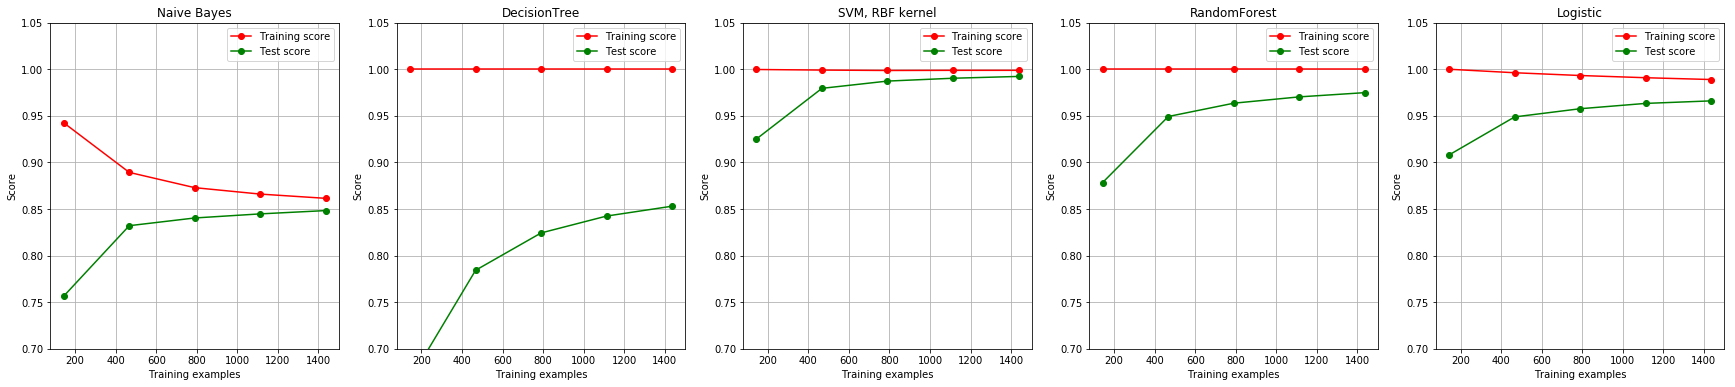

In [73]:
fig,axes=plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,models):
    times=time()
    plot_learning_curve(estimator,title_,X,y,
                        ax=axes[ind],ylim=[0.7,1.05],n_jobs=4,cv=cv)
    print('{}:{}'.format(title_,datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f')))
plt.show()

# 线性回归算法

## 导入包和数据

In [94]:
from sklearn.linear_model import LinearRegression as LR      #导入线性回归方法
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
from sklearn.metrics import mean_squared_error as MSE        #导入查看均方误差方法
from sklearn.metrics import r2_score                         #导入查看R方方法
import pandas as pd

In [76]:
housevalue=fch()
X=pd.DataFrame(housevalue.data)
y=housevalue.target

In [77]:
X.columns=housevalue.feature_names
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区⼈口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区⼈口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

## 划分数据集

In [78]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,
                                          random_state=420)

## 建模

In [81]:
reg=LR().fit(Xtrain,Ytrain)

## 查看相关属性

### 看预测值

In [86]:
y_pred=reg.predict(Xtest)
y_pred

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

### 看系数

In [83]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

### 看截距

In [84]:
reg.intercept_

-36.25689322920386

## 回归类模型评估指标

### 是否预测了正确的数值

#### 看均方误差MSE
- 需要使用from sklearn.metrics import mean_squared_error as MSE

In [88]:
MSE(Ytest,y_pred)  #均方误差越小越好，越接近0越准确率越高

0.5309012639324571

#### 交叉验证看负均方误差(neg_mean_squared_error)
- sklearn中是负值的，可以使用abs转换为正的

In [93]:
(cross_val_score(reg,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=10),
 cross_val_score(reg,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=10).mean())

(array([-0.52730876, -0.50816696, -0.48736401, -0.49269076, -0.56611205,
        -0.53795641, -0.48253409, -0.5130032 , -0.53188562, -0.60443733]),
 -0.5251459182173354)

### 是否拟合了足够的信息
- 看R方
- 使用from sklearn.metrics import r2_score

In [95]:
r2_score(Ytest,y_pred)

0.6043668160178817

# 岭回归
- 可以解决多重共线性问题：完全相关和高度相关

## 导入包和数据

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge                            #导入岭回归方法
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import cross_val_score

In [98]:
housevalue=fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

## 划分数据集

In [103]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,
                                          random_state=420)

## 建模

In [104]:
# 在使用循环找最佳的alpha,一般是从0.1至5或10
reg_score=[]
for i in np.linspace(0.1,5,50):
    reg=Ridge(alpha=i).fit(Xtrain,Ytrain)
    reg_score.append(reg.score(Xtest,Ytest))
n=max(reg_score)
n

0.6043662413777806

In [109]:
reg_best=Ridge(alpha=0.6).fit(Xtrain,Ytrain)
y_pred=reg_best.predict(Xtest)
print(MSE(Ytest,y_pred))
cross_val_score(reg_best,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=10).mean()

0.5309059060069266


-0.5251343926029642

In [110]:
cross_val_score(reg,Xtrain,Ytrain,cv=5,scoring = "r2").mean()  #通过交叉验证看R方另一种方式

0.6044859990086563

In [111]:
cross_val_score(reg,Xtest,Ytest,cv=5,scoring = "r2").mean()

0.5538677536954386

# Lasso
- 只能处理高度相关的多重共线性
- 常用于特征选择，因为会缩减一些特征

## 导入包和数据

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso                          #导入Lasso方法
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import cross_val_score

In [114]:
housevalue=fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

## 划分数据集

In [115]:
Xtrain,Xtest,Ytrain,Ytest=TTS(X,y,test_size=0.3,random_state=420)

## 建模

In [117]:
l_score=[]
for i in np.linspace(1,100,1):
    l=Lasso(alpha=i).fit(Xtrain,Ytrain)
    l_score.append(l.score(Xtest,Ytest))
max(l_score)

0.28251512012510915

In [118]:
l_best=Lasso(alpha=0.28).fit(Xtrain,Ytrain)
cross_val_score(l_best,Xtrain,Ytrain,cv=5,scoring = "r2").mean()

0.4954851854414087

# 逻辑回归
- 需要设置参数C：是浮点数，默认是1.0
- 参数max_iter 和solver必须同时调整
- solver参数是下降梯度算法选择:liblinear——坐标；sag——随机；newton-cg——牛顿；lbfgs——另一种牛顿
- 当penalty='l1',只能用'liblinear'
- 当penalty='l2'，上述四种都可以用
- 当小数据且penalty='l1'，用'liblinear'（10万以下）
- 当数据比较大且损失函数特征比较多不好算，用sag/newton-cg/lbfgs（大于10万，首选sag
- 当数据特别特别大，用sag（百万以上）
-  max_iter是最大迭代次数。越大，代表步长越小，模型迭代时间越长；反之，则代表步长设置很大，模型迭代时间很短

## 导入包和数据

In [1]:
from sklearn.linear_model import LogisticRegression as LR        #导入逻辑回归实例化方法
from sklearn.datasets import load_breast_cancer                  #导入乳腺癌数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score                       #导入分类准确性评估方法

In [120]:
data = load_breast_cancer()
X = data.data
y = data.target

data.data.shape

(569, 30)

## 划分数据集

In [121]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

## 画不同C值下两种正则化模型学习曲线

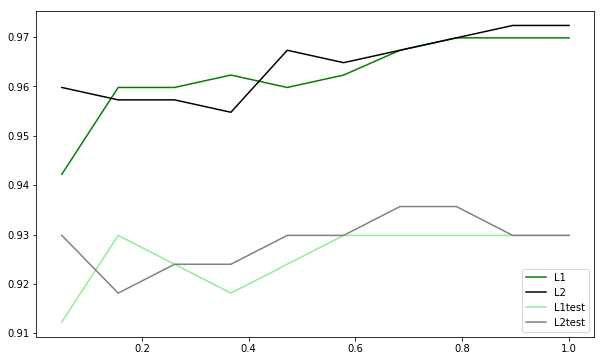

In [123]:
l1 = []
l2 = []
l1test = []
l2test = []

for i in np.linspace(0.05,1,10):
    lrl1=LR(penalty='l1',C=i,solver='liblinear',max_iter=1000)
    lrl2=LR(penalty='l2',C=i,solver='liblinear',max_iter=1000)
    
    lr1=lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(Ytrain,lr1.predict(Xtrain)))
    l1test.append(accuracy_score(Ytest,lr1.predict(Xtest)))
    
    lr2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(Ytrain,lr2.predict(Xtrain)))
    l2test.append(accuracy_score(Ytest,lr2.predict(Xtest)))
    
graph=[l1,l2,l1test,l2test]    
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"] 

plt.figure(figsize=(10,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,10),graph[i],color=color[i],label=label[i])

plt.legend(loc=4) #右下角显示图例
plt.show()

## max_iter调参

D:\tool\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\tool\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\tool\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


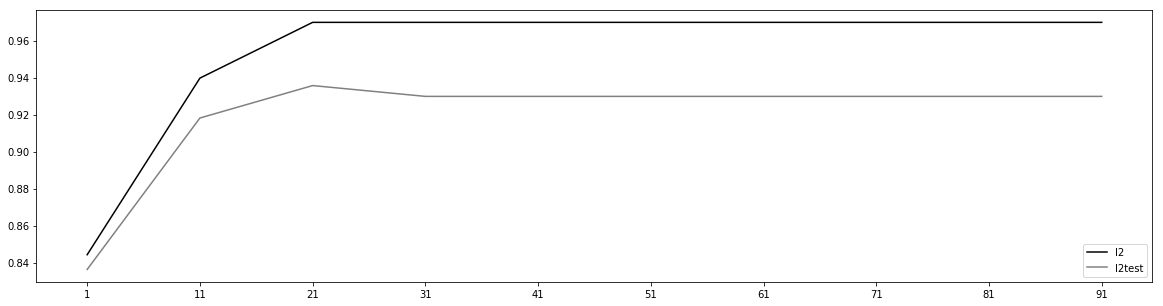

In [134]:
l2=[]
l2test=[]

for i in np.arange(1,100,10):
    lrl2=LR(penalty='l2',C=0.9,max_iter=i,solver='liblinear')
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(lrl2.score(Xtrain,Ytrain))
    l2test.append(lrl2.score(Xtest,Ytest))    
    
graph=[l2,l2test]
color=['black','gray']
label=['l2','l2test']

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,100,10),graph[i],color=color[i],label=label[i])

plt.xticks(np.arange(1,100,10))
plt.legend(loc=4)
plt.show()


# K-Means 算法
- K-Means算法没有标签数据，不用划分数据集，直接用样本数据做分类
- 另同时画图更能直观看效果
- 对非球形边界的数据很难达到一个较好的分类效果

## 重要参数说明
- n_clusters是重要参数，其他参数一般默认，特殊业务情景才调整。
- init:初始化质心的方法，默认是K-means++
- random_state:控制每次质心随机初始化的随机数种子
- n_init: 使用不同的质心随机初始化的种子，来运行kmeans算法的次数。
- max_iter:最大迭代次数
- tol:容差，两次迭代间inertia下降的量

## 导入包和数据

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans           #导入K-Means算法实例化方法

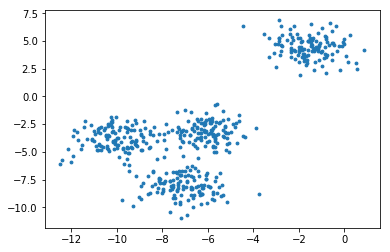

In [6]:
#自己创建数据集 n_features 是特征数；centers 是生成中心数量，默认是3
X,y=make_blobs(n_samples=500,n_features=2,
              centers=4,random_state=1)
plt.scatter(X[:,0],X[:,1],
            marker='o',  #点的形状
            s=8      #点的大小
           )

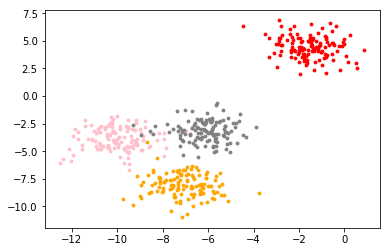

In [3]:
#如果我们想要看见这个点的分布，怎么办？
color = ["red","pink","orange","gray"]
for i in range(4):
    plt.scatter(X[y==i, 0], X[y==i, 1]
            ,marker='o' #点的形状
            ,s=8 #点的大小
            ,c=color[i])

## 建模

In [8]:
n_cluster=4  #设置质心数,即簇数

# 若数据量特别大，一般是随机抽取一部分数据量先生成模型，再用模型预测所有数据
kmeans=KMeans(n_clusters=n_cluster,random_state=1).fit(X)

## 查看相关属性

### 看标签数据


In [10]:
kmeans.labels_   #也有预测方法 kmeans.predict(X)  #用已有数据做预测的效果和labels_一样

array([2, 2, 0, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 1, 3, 0, 0,
       3, 1, 3, 3, 1, 1, 0, 3, 2, 1, 3, 2, 3, 2, 0, 0, 2, 0, 3, 0, 1, 3,
       3, 2, 0, 3, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 3, 1, 1, 0, 3, 1, 3,
       2, 3, 0, 0, 2, 0, 3, 2, 3, 3, 2, 3, 3, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 3, 1, 2, 2, 3, 2, 1, 1, 2, 1, 0, 1, 3, 3, 1, 1, 0,
       3, 2, 1, 0, 1, 0, 1, 3, 1, 3, 0, 2, 2, 0, 3, 0, 1, 2, 2, 3, 1, 0,
       0, 0, 0, 2, 1, 3, 1, 1, 3, 2, 3, 1, 1, 1, 3, 3, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 2, 1, 0,
       0, 0, 0, 2, 3, 0, 1, 2, 2, 0, 3, 2, 2, 3, 1, 1, 2, 2, 3, 1, 3, 2,
       2, 1, 2, 0, 1, 3, 3, 2, 3, 0, 2, 3, 0, 3, 0, 2, 3, 3, 3, 1, 0, 1,
       3, 2, 0, 3, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 3, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 3, 1, 1, 3, 3, 1, 0, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 2, 2, 0, 0, 0, 3, 1, 1, 3, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 3, 0, 0, 0, 3, 3, 0, 2, 1, 2, 2, 2, 3, 0,

### 查看质心

In [12]:
kmeans.cluster_centers_   # n_cluster 值是多少，就出多少个质心数据

array([[-10.00969056,  -3.84944007],
       [ -1.54234022,   4.43517599],
       [ -7.09306648,  -8.10994454],
       [ -6.08459039,  -3.17305983]])

### 查看总SSE:inertia_

In [13]:
kmeans.inertia_

908.3855684760613

## 画图

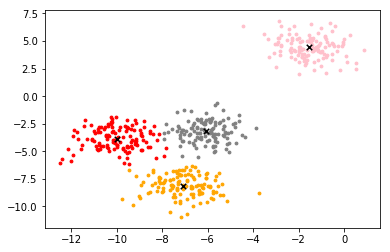

In [25]:
y_pred=kmeans.labels_
color=["red","pink","orange","gray"]  #颜色种数需与n_cluster值一致

for i in range(n_cluster):
    plt.scatter(X[y_pred==i,0],X[y_pred==i,1],
               color=color[i], 
               marker='o', #点的形状
               s=8         #点的大小
               )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
        color='k',
        marker='x',
        s=30
           )

## 模型评估指标——轮廓系数
- 需调用 from sklearn.metrics import silhouette_score 查看所有样本的轮廓系数的均值
- 还需调用 from sklearn.metrics import silhouette_samples 查看每个样本⾃自⼰己的轮廓系数
- 这两个数据需结合一起看才有意义，一般通过图示观察比较

### 画轮廓系数图
- 步骤一、基于轮廓系数来选择最佳的n_clusters（一个聚类下画两张图）
- 步骤二、知道每一个聚出来的类的轮廓系数，还想要一个各个类之间的轮廓系数对比
- 步骤三、知道聚类完成后图像的分布长什么样，哪些数据要一致
- 可以通过这个方式探索最佳的n_cluster 值

#### 导入包和数据

In [28]:
from sklearn.metrics import silhouette_score,silhouette_samples

import matplotlib.cm as cm         #导入色彩映射函数，浮点数效果更佳
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [29]:
X,y=make_blobs(n_samples=500,n_features=2,
              centers=4,random_state=1)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857
For n_clusters = 8 The average silhouette_score is : 0.33148538996489124
For n_clusters = 9 The average silhouette_score is : 0.3343432415611716


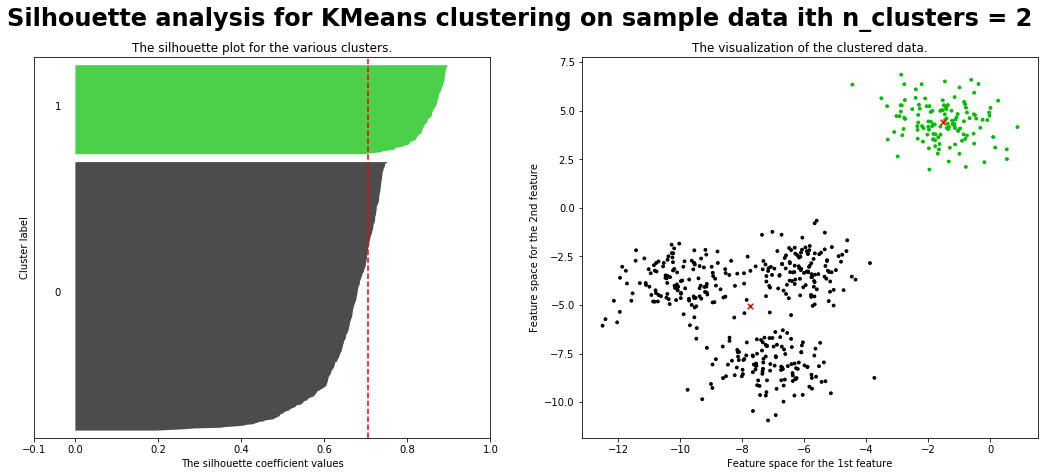

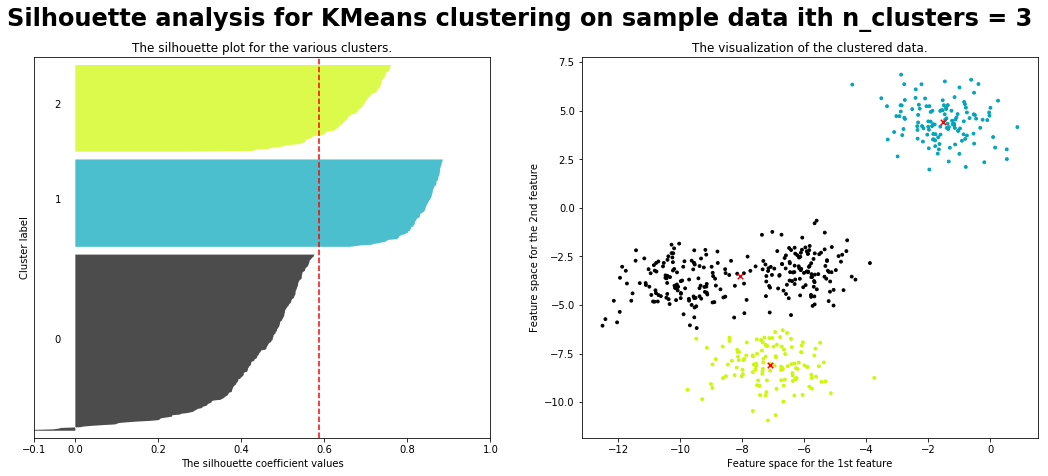

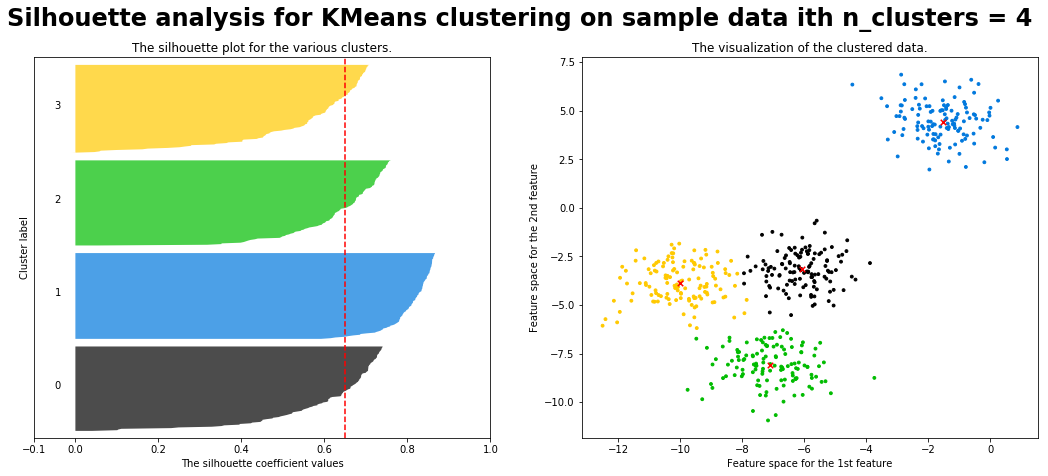

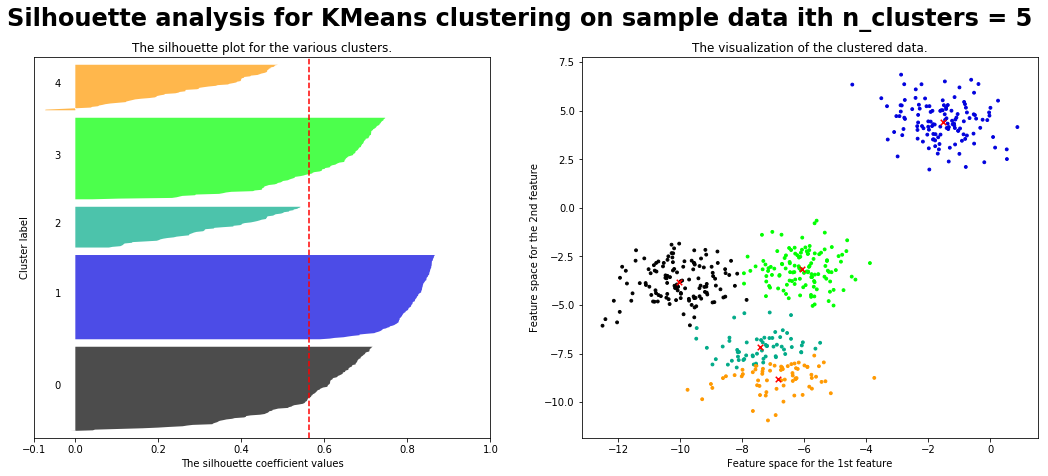

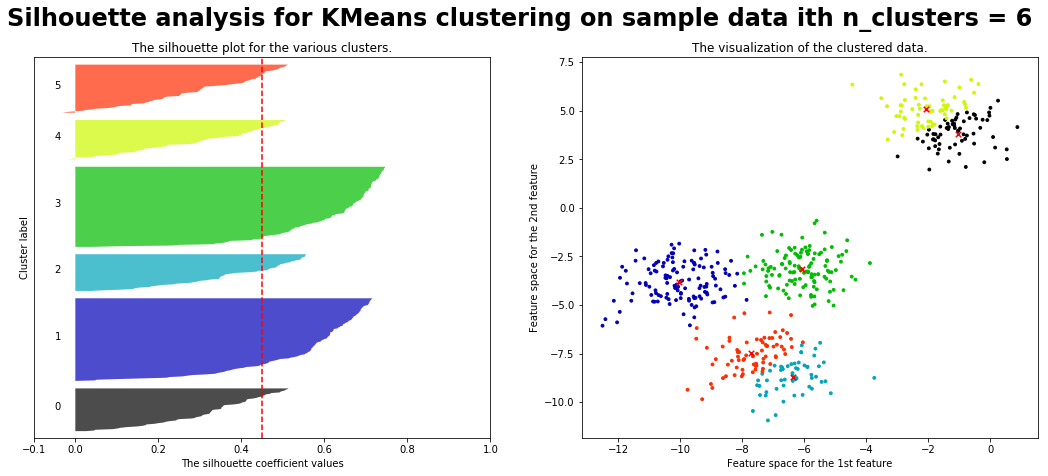

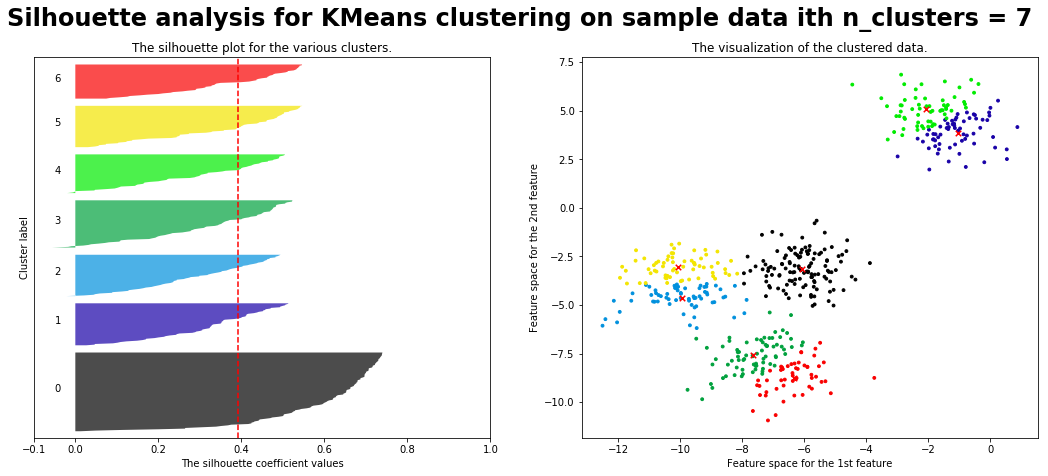

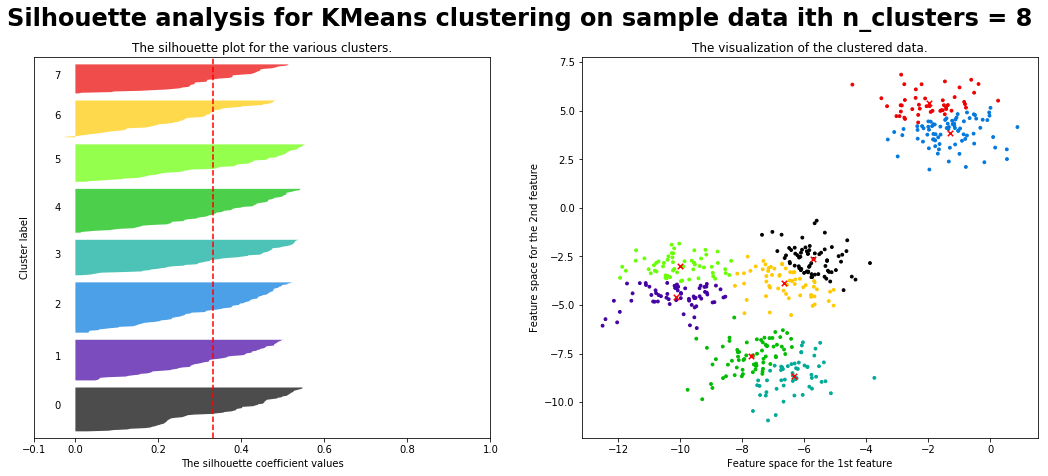

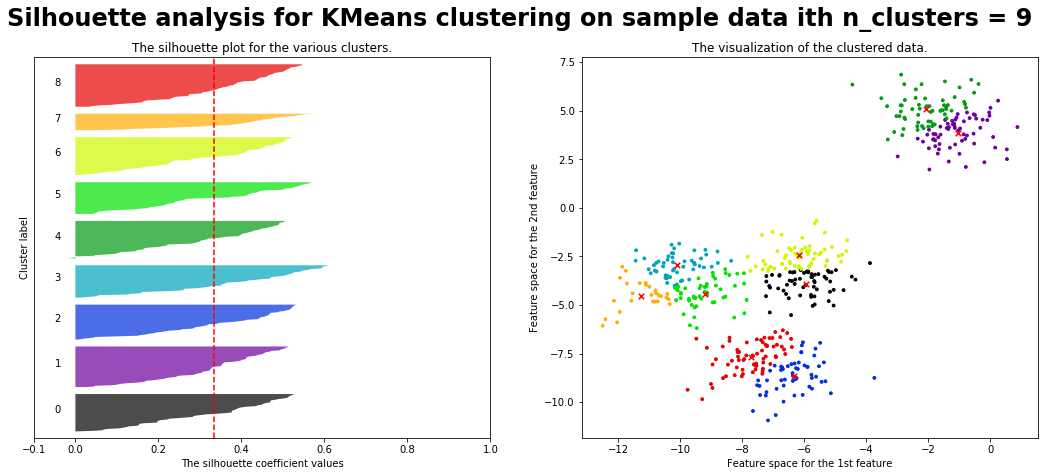

In [37]:
#循环迭代n_cluster
for n_cluster in range(2,10):
    #创建一个画布，画布上共有一行两列两个图
    fig,(ax1,ax2)=plt.subplots(1,2)
    
    #设置画布尺寸
    fig.set_size_inches(18,7)
    
    # 第一个图是我们的轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图
    # 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数是对于每一个样本进行计算的

    # 首先我们来设定横坐标
    # 轮廓系数的取值范围在[-1,1]之间，但我们至少是希望轮廓系数要大于0的
    # 太长的横坐标不利于我们的可视化，所以只设定X轴的取值在[-0.1,1]之间
    ax1.set_xlim([-0.1,1])
    
    # 接下来设定纵坐标，通常来说，纵坐标是从0开始，最大值取到X.shape[0]的取值
    # 但我们希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
    # 以便我们看到不同的条形图聚合成的块，理解它是对应了哪一个簇
    # 因此我们在设定纵坐标的取值范围的时候，在X.shape[0]上，加上一个距离(n_clusters + 1) * 10，留作间隔用
    ax1.set_ylim([0,X.shape[0]+(n_cluster+1)*10])
    
    # 开始建模，调用聚类好的标签
    kmeans=KMeans(n_clusters=n_cluster,random_state=10).fit(X)
    labels=kmeans.labels_
    
    # 调用轮廓系数分数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
    # 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
    silhouette_avg=silhouette_score(X,labels)
    
    #用print来报一下结果，现在的簇数量下，整体的轮廓系数究竟有多少
    print('For n_clusters =',n_cluster,
         'The average silhouette_score is :',silhouette_avg)
    
    # 调用silhouette_samples，返回每个样本点的轮廓系数，这就是我们的横坐标
    sample_silhouette_values=silhouette_samples(X,labels)
    
    #设定y轴上的初始取值
    y_lower=10
    
    #接下来，对每一个簇进行循环
    for i in range(n_cluster):
        # 从每个样本的轮廓系数结果中抽取出第i个簇的轮廓系数，并对他进行排序
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        
        #注意, .sort()这个命令会直接改掉原数据的顺序
        ith_cluster_silhouette_values.sort()
        
        #查看这一个簇中究竟有多少个样本
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        
        #这一个簇在y轴上的取值，应该是由初始值(y_lower)开始，到初始值+这个簇中的样本数量结束(y_upper)
        y_upper=y_lower+size_cluster_i
        
        #colormap库中的，使用小数来调用颜色的函数
        #在nipy_spectral([输入任意小数来代表一个颜色])
        #在这里我们希望每个簇的颜色是不同的，我们需要的颜色种类刚好是循环的个数的种类
        #在这里，只要能够确保，每次循环生成的小数是不同的，可以使用任意方式来获取小数
        #在这里，我是用i的浮点数除以n_clusters，在不同的i下，自然生成不同的小数
        #以确保所有的簇会有不同的颜色
        color=cm.nipy_spectral(i/n_cluster)
        
        #开始填充子图1中的内容
        #fill_between是填充曲线与直角之间的空间的函数
        #fill_betweenx的直角是在纵坐标上
        #fill_betweeny的直角是在横坐标上
        #fill_betweenx的参数应该输入(定义曲线的点的纵坐标，定义曲线的点的横坐标，柱状图的颜色)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                          ith_cluster_silhouette_values,
                         facecolor=color,
                         alpha=0.7)
        
        #为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
        #text的参数为(要显示编号的位置的横坐标，要显示编号的位置的纵坐标，要显示的编号内容)
        ax1.text(-0.05,y_lower+size_cluster_i*0.5,str(i))
        
        # 为下一个簇计算新的y轴上的初始值，是每一次迭代之后，y的上线再加上10
        #以此来保证，不同的簇的图像之间显示有空隙
        y_lower=y_upper+10
    
    #给图1加上标题，横坐标轴，纵坐标轴的标签
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    
    #把整个数据集上的轮廓系数的均值以虚线的形式放入我们的图中
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    
    #让y轴不显示任何刻度
    ax1.set_yticks([])
    
    #让x轴上的刻度显示为我们规定的列表
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    #开始对第二个图进行处理，首先获取新颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
    colors=cm.nipy_spectral(labels.astype(float)/n_cluster)
    
    ax2.scatter(X[:,0],X[:,1],
                marker='o',   #点的形状
                s=8,          #点的大小
                color=colors
               )
    #把生成的质心放到图像中去
    ax2.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
               marker='x',
               s=30,
               color='red')
    
    #为图二设置标题，横坐标标题，纵坐标标题
    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    
    #为整个图设置标题
    plt.suptitle(('Silhouette analysis for KMeans clustering on sample data '
                 'ith n_clusters = %d'%n_cluster),
                fontsize=24,fontweight='bold')
    

# DBSCAN算法
- DBSCAN:利用密度进行聚类的方法
- 对噪音数据有很好的聚类效果
- 没有质心点之说
- 重要参数 eps：画圈的半径长度

## 导入包和数据

In [41]:
import matplotlib.cm as cm         #导入色彩映射函数，浮点数效果更佳
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons   #导入类月亮数据集
from sklearn.cluster import DBSCAN        #导入DBSCAN算法实例化方法

In [42]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=10)

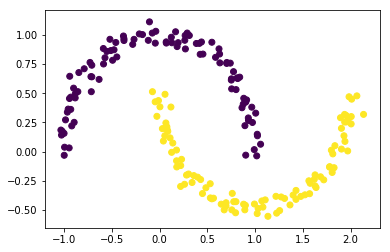

In [43]:
plt.scatter(X[:,0],X[:,1],c=y)

## 建模

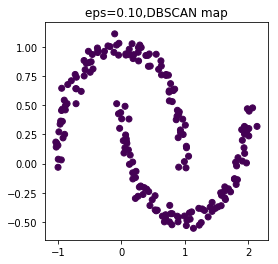

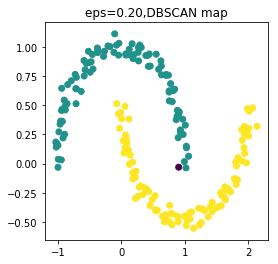

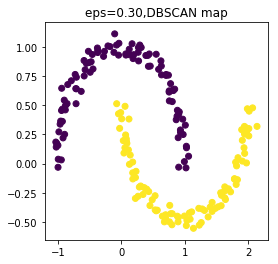

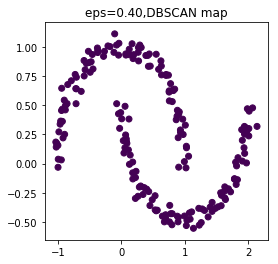

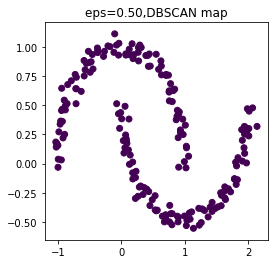

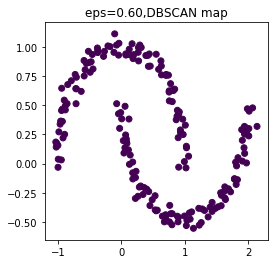

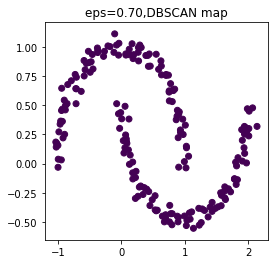

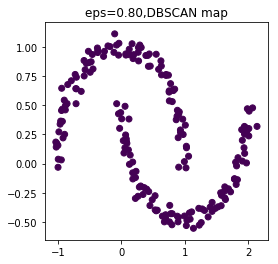

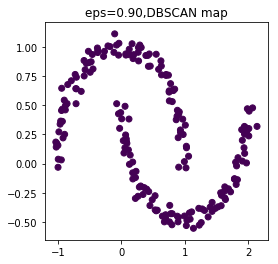

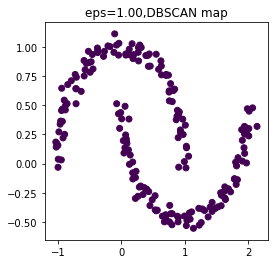

In [49]:
for eps in np.linspace(0.1,1,10):
    plt.figure(figsize=(4,4))
    db=DBSCAN(eps=eps,min_samples=10)
    db.fit(X)
    plt.scatter(X[:,0],X[:,1],c=db.labels_)
    plt.title('eps=%.2f,DBSCAN map'%eps)

# PCA——特征降维算法
- 通过分解特征矩阵来进行降维
- 即减少特征的数量，又保留大部分有效信息
- sklearn.decomposition.PCA (n_components=None, copy=True, whiten=False,svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)
- 重要参数是n_components,这是一个超参数，范围在入[0, min(X.shape)]之间，既不能太大也不能太小。其他参数默认情况下，这个参数是降维后的维度数(即新特征数)。另需要结合实际业务确定这个参数的值。
- 选择最优的n_components有三种方法：①累计可解释方差贡献率曲线、②最大似然估计(即设置n_components='mle')、③按信息量占比(需设置svd_solver='full',此时n_components是希望保留信息量的百分比，PCA会自动选出保留的信息量超过这个百分比的特征数量)

## 导入包和数据

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from sklearn.decomposition import PCA      #导入PCA降维实例化方法
from sklearn.datasets import load_iris     #导入鸢尾花数据集

In [3]:
iris=load_iris()

X=iris.data
y=iris.target
X.shape

(150, 4)

## 建模

In [54]:
pca=PCA(n_components=2)
pca=pca.fit(X)
X_dr=pca.fit_transform(X)
X_dr.shape

(150, 2)

## 查看属性

### 属性explained_variance_

In [55]:
# 查看降维后每个新特征向量上所带的信息量大小(可解释性方差的大小)
pca.explained_variance_

array([4.22824171, 0.24267075])

### 属性explained_variance_ratio_

In [56]:
# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫可解释性方差贡献率
pca.explained_variance_ratio_  #可以看出大部分信息被有效地集中在第一个特征上

array([0.92461872, 0.05306648])

In [57]:
# 查看所有特征的贡献率，常用看这个指标;剩余比例的信息被模型排除
pca.explained_variance_ratio_.sum()

0.9776852063187949

## 画图

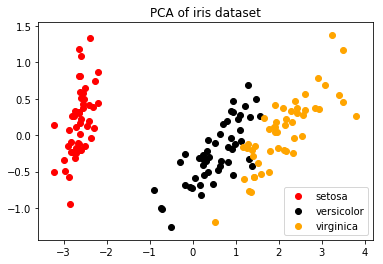

In [75]:
plt.figure()
colors=['red','black','orange']
for i in list(np.unique(y)):
    plt.scatter(X_dr[y==i,0],X_dr[y==i,1],c=colors[i],label=iris.target_names[i])
plt.legend(loc=4)
plt.title('PCA of iris dataset')
plt.show()

## 参数调优方法

### 方法一：累计可解释方差贡献率曲线
- 通过图示观察

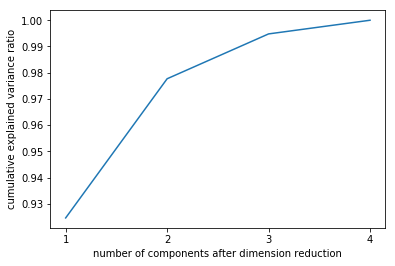

In [79]:
import numpy as np

pca_xline=PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_xline.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel('number of components after dimension reduction')
plt.ylabel('cumulative explained variance ratio')
#plt.grid()
plt.show()

### 方法二：最大似然估计自选超参数
- 即设置 n_components='mle'

In [83]:
pca_mle=PCA(n_components='mle')
pca_mle=pca_mle.fit(X)

X_mle=pca_mle.transform(X)

print(X_mle.shape)  #mle 自动选择了3个特征

pca_mle.explained_variance_ratio_.sum()
#得到了了⽐比设定2个特征时更⾼高的信息含量，对于鸢尾花这个很小的数据集来说，3个特征对应这么⾼高的信息
#含量，并不需要去纠结于只保留2个特征，毕竟三个特征也可以可视化


(150, 3)


0.9947878161267246

### 方法三：按信息量占比选超参数
- 设置n_components为某个百分比，svd_solver='full'

In [84]:
pca_f=PCA(n_components=0.97,svd_solver='full')
pca_f=pca_f.fit(X)
X_f=pca_f.transform(X)

pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [91]:
pca_f=PCA(n_components=0.99,svd_solver='full') 
pca_f=pca_f.fit(X)
X_f=pca_f.transform(X)

#可以看出n_components达到一定比例后特征数相应增加
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

# 随机森林分类器
- 重要参数：和决策树一样有相同的参数，另有n_estimators、bootstrap & oob_score
- n_estimators：基评估器的数量。n_estimators越大，模型的效果往往越好。
- bootstrap：默认为True，代表采用这种有放回的随机抽样技术。一般选择默认
- oob_score：是否设置袋外数据，选择True时，可以查看oob_score_属性，可以不用划分训练集和测试集，袋外数据就相当于测试集的效果。默认是False
- random_state:作用与决策树不一样，是固定每个决策树的random_sate值，控制生成森林的模式，基分类器会相互独立不相同

## 导入包和数据

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier   #导入随机森林分类器
from sklearn.datasets import load_wine                #导入红酒数据集
from sklearn.model_selection import cross_val_score   #导入交叉验证函数

In [2]:
wine=load_wine()
wine.data.shape

(178, 13)

## 建模

In [5]:
rfc_1=RandomForestClassifier(n_estimators=25,criterion='gini'
                           ,max_depth=3,min_samples_split=3,min_samples_leaf=2
                          ,oob_score=True,random_state=420)
rfc_1=rfc_1.fit(wine.data,wine.target)

## 重要属性和接口

### oob_score_查看袋外数据效果

In [6]:
rfc_1.oob_score_

0.9662921348314607

### estimators_查看每个基评估器

In [7]:
rfc_1.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=3,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1355688881, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=3,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=36893768, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=3,
             min_weight_fracti

### feature_importances_查看重要特征

In [8]:
rfc_1.feature_importances_

array([0.19197665, 0.04723848, 0.00932752, 0.03805481, 0.04165128,
       0.0881132 , 0.11108133, 0.00286457, 0.01737881, 0.15037447,
       0.11014075, 0.14173228, 0.05006584])

### classes_查看类别

In [19]:
rfc_1.classes_

array([0, 1, 2])

### score()查看准确性
- 需要划分数据集，oob_score=False
- 基分类器的判断准确率至少要超过50%

In [13]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target
                                           ,test_size=0.2,random_state=420)
rfc_2=RandomForestClassifier(n_estimators=25,criterion='gini'
                           ,max_depth=3,min_samples_split=3,min_samples_leaf=2
                          ,oob_score=False,random_state=420)
rfc_2=rfc_2.fit(Xtrain,Ytrain)

rfc_2.score(Xtest,Ytest)

0.9444444444444444

### apply()每个测试样本坐落在每棵树叶子节点的索引

In [14]:
rfc_2.apply(Xtest)

array([[ 6, 10,  4, 11, 10,  7,  7,  7,  5, 11,  9,  3,  5, 11,  7,  8,
         3,  6,  9,  3,  9,  7,  3,  9, 10],
       [13,  6,  2,  3,  9,  2,  3,  2,  3,  5,  2, 10,  1,  9,  2,  5,
         6,  3,  4,  7,  9,  4,  6,  5, 10],
       [14, 10, 10, 14, 10, 10, 10, 10, 10, 12,  7, 11,  6, 12,  8, 12,
        10, 10, 12,  7, 12,  7,  6, 12, 10],
       [14, 10, 10, 14, 10, 10, 10, 10, 10, 12, 10, 11,  6, 12,  8, 12,
        10, 10, 12, 14, 12, 12, 12, 12, 10],
       [13,  7, 10, 14,  7, 10,  3,  3, 10, 12,  3, 11,  6, 12,  8, 12,
        10,  3, 11, 14,  7, 12,  7, 12,  7],
       [14, 10, 10, 14,  7, 10, 10, 10, 10, 12, 10,  7,  6, 12,  6,  9,
         9, 10, 12, 14,  7, 12, 12, 12,  7],
       [13,  6,  7,  4, 10,  2,  2,  2,  7,  5,  3,  6,  1,  9,  7,  5,
         2,  3,  4, 13, 11,  9,  4,  5, 10],
       [14, 10, 10, 14,  7, 10, 10, 10, 10, 12, 10, 11,  6, 12,  8, 12,
        10, 10, 12, 14,  7, 12,  7, 12,  7],
       [14, 10, 10, 14, 10, 10, 10, 10, 10, 12, 10, 11,  6, 12, 

### predict()预测结果

In [15]:
rfc_2.predict(Xtest)

array([2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0])

### predict_proba()返回被预测为每种类别的概率

In [16]:
rfc_2.predict_proba(Xtest)

array([[0.04449225, 0.2565884 , 0.69891935],
       [0.05306004, 0.75860663, 0.18833333],
       [0.74307372, 0.1917004 , 0.06522587],
       [0.86698444, 0.10562752, 0.02738804],
       [0.76503812, 0.23235318, 0.0026087 ],
       [0.84777699, 0.08627596, 0.06594704],
       [0.02342559, 0.95566254, 0.02091188],
       [0.95434477, 0.03026719, 0.01538804],
       [0.91971375, 0.06489821, 0.01538804],
       [0.01362848, 0.97242042, 0.01395109],
       [0.00708303, 0.95302848, 0.03988849],
       [0.        , 0.06682883, 0.93317117],
       [0.78242294, 0.18435118, 0.03322587],
       [0.01009225, 0.91910062, 0.07080713],
       [0.67790623, 0.30532489, 0.01676888],
       [0.        , 0.00920978, 0.99079022],
       [0.02      , 0.43929412, 0.54070588],
       [0.3123801 , 0.63129877, 0.05632113],
       [0.86127494, 0.12333702, 0.01538804],
       [0.00922589, 0.95777452, 0.0329996 ],
       [0.01362848, 0.97242042, 0.01395109],
       [0.01790178, 0.95547206, 0.02662616],
       [0.

## n_estimators的学习曲线

最佳n_estimators为：16,相应模型得分：0.9944444444444445


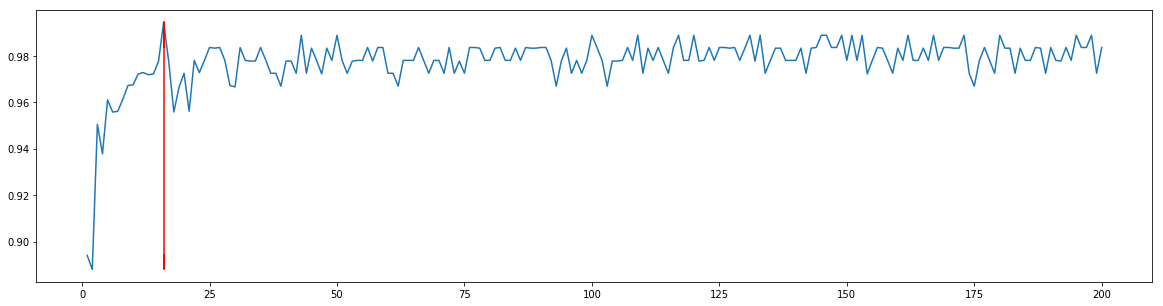

In [51]:
score_all=[]
for i in range(1,201):
    rfc=RandomForestClassifier(n_estimators=i)
    rfc_s=cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    score_all.append(rfc_s)
print('最佳n_estimators为：{},相应模型得分：{}'.format(score_all.index(max(score_all))+1,max(score_all)))
plt.figure(figsize=(20,5))
plt.plot(range(1,201),score_all)
plt.plot([score_all.index(max(score_all))+1]*200,score_all,'-',color='r')
plt.show()

## 尝试用网格搜索调参

In [53]:
#这一步，建议大家一个参数一个参数的跑，不要多参跑，时间需要特别长
from sklearn.model_selection import GridSearchCV

params={'n_estimators':range(1,30),
        'criterion':['gini','entropy'],
        'max_depth':range(2,10),
        'min_samples_split':range(2,30,2),
        'min_samples_leaf':range(2,30,2)}
reg=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5)
reg.fit(Xtrain,Ytrain).best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 14,
 'n_estimators': 22}

In [55]:
rfc_best=RandomForestClassifier(n_estimators=22,criterion='gini'
                                ,max_depth=8,min_samples_leaf=4
                                ,min_samples_split=14,random_state=420)
rfc_best.fit(Xtrain,Ytrain)
rfc_best.score(Xtest,Ytest)

0.9722222222222222

### 使用混淆矩阵

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest,rfc_best.predict(Xtest))

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  7]], dtype=int64)

# 随机森林回归器
- 填补缺失值
- 在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均值，中值，或者其他最常用的数值填补到数据中
- 因解释性差，实用性不好

## 导入包和数据

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer                #sklearn填充缺失值包
from sklearn.ensemble import RandomForestRegressor      #导入随机回归器

from sklearn.model_selection import cross_val_score 

In [61]:
dataset=load_boston()
dataset.data.shape

(506, 13)

In [62]:
X_full,y_full= dataset.data,dataset.target
n_samples=X_full.shape[0]
n_features=X_full.shape[1]

## 为完整数据集放入缺失值

In [65]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng=np.random.RandomState(0)
missing_rate=0.5
n_missing_samples=int(np.floor(n_samples*n_features*missing_rate))
print('n_missing_sampless：',n_missing_samples)
#np.floor向下取整，返回.0格式的浮点数

#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那
#我们就可以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features=rng.randint(0,n_features,n_missing_samples)
missing_samples=rng.randint(0,n_samples,n_missing_samples)

#missing_samples =rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果
#我们需要的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取
#不重复的随机数，因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

x_missing=X_full.copy()
y_missing=y_full.copy()

x_missing[missing_samples,missing_features]=np.nan
x_missing=pd.DataFrame(x_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上
#却不如pandas来得好用

n_missing_sampless： 3289


In [66]:
x_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.9,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33


## 填充缺失值

### 方法一：用均值填充缺失值

In [68]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
x_missing_mean=imp_mean.fit_transform(x_missing)  #等价于imp_mean.fit(x_missing).transform(x_missing)
x_missing_mean

array([[3.62757895e+00, 1.80000000e+01, 1.11634641e+01, ...,
        1.85211921e+01, 3.52741952e+02, 4.98000000e+00],
       [2.73100000e-02, 0.00000000e+00, 1.11634641e+01, ...,
        1.85211921e+01, 3.96900000e+02, 9.14000000e+00],
       [2.72900000e-02, 1.07229508e+01, 7.07000000e+00, ...,
        1.85211921e+01, 3.52741952e+02, 1.29917666e+01],
       ...,
       [3.62757895e+00, 1.07229508e+01, 1.19300000e+01, ...,
        2.10000000e+01, 3.52741952e+02, 5.64000000e+00],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.85211921e+01, 3.96900000e+02, 7.88000000e+00]])

### 方法二：用0填充缺失值

In [69]:
imp_0=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
x_missing_0=imp_0.fit_transform(x_missing)     #等价于imp_0.fit(x_missing).transform(x_missing) 
x_missing_0

array([[0.0000e+00, 1.8000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 0.0000e+00,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 0.0000e+00, 3.9690e+02,
        7.8800e+00]])

### 方法三：使用随机森林填补缺失值

In [ ]:
"""
使用随机森林回归填补缺失值

任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法
认为，特征矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地
区，环境，附近学校数量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预
测“房价”，也可以反过来，用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利
用了这种思想。

对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的
标签组成新的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特
征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。

特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train

特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test

这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？
答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵
中，再继续填补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填
补的特征就越来越少。当进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何
的其他特征需要用0来进行填补了，而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失
最多的特征。
遍历所有的特征后，数据就完整，不再有缺失值了。
"""

In [72]:
x_missing_reg=x_missing.copy()
sortindex=np.argsort(x_missing_reg.isnull().sum(axis=0)).values   #按特征值缺失值数量排序并返回对应的索引



In [75]:
for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df=x_missing_reg
    fillc=df.iloc[:,i]
    df=pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0=SimpleImputer(missing_values=np.nan
                       ,strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain=fillc[fillc.notnull()]
    Ytest=fillc[fillc.isnull()]
    Xtrain=df_0[Ytrain.index,:]
    Xtest=df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc=RandomForestRegressor(n_estimators=100)      
    rfc=rfc.fit(Xtrain,Ytrain)
    Ypredict=rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i]=Ypredict
                       

In [76]:
x_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.269269,18.00,6.7507,0.15,0.538000,6.72676,65.20,4.090000,1.00,296.00,18.422,390.1225,4.9800
1,0.027310,0.00,5.9277,0.00,0.469000,6.13947,78.90,4.967100,2.00,294.58,18.382,396.9000,9.1400
2,0.027290,16.82,7.0700,0.00,0.465806,7.18500,61.10,4.441104,2.00,242.00,17.793,387.5320,4.9570
3,0.097087,21.97,3.0013,0.00,0.458000,6.87479,45.80,4.781811,3.70,222.00,18.700,393.6654,5.8962
4,0.167471,0.00,2.1800,0.00,0.476250,7.14700,59.71,4.531750,3.56,232.29,18.700,392.0603,5.3300


##  对填补好的数据进行建模

In [79]:
X=[X_full,x_missing_mean,x_missing_0,x_missing_reg]

mse=[]
for x in  X:
    estimator=RandomForestRegressor(random_state=0,n_estimators=100)
    scores=cross_val_score(estimator,x,y_full,
                          scoring='neg_mean_squared_error',cv=5).mean()  
    mse.append(abs(scores))
mse

[21.62860460743544, 40.84405476955929, 49.50657028893417, 17.617064478314884]

## 用条形图对比以上结果

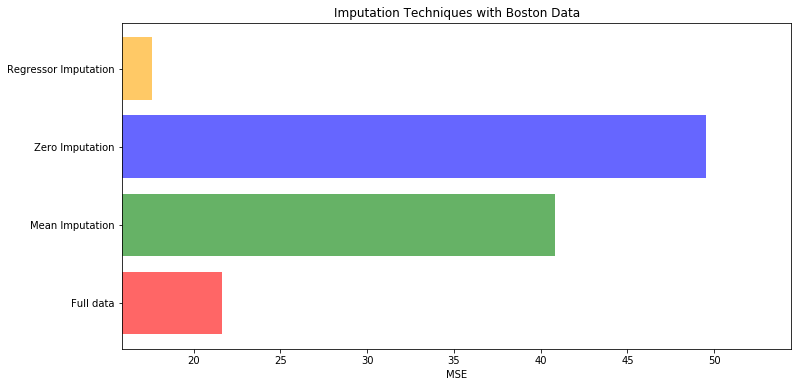

In [80]:
x_labels=['Full data','Mean Imputation','Zero Imputation','Regressor Imputation']
colors=['r','g','b','orange']

plt.figure(figsize=(12,6))
ax=plt.subplot(111)
for i in range(len(mse)):
    ax.barh(i,mse[i],color=colors[i],label=x_labels[i],alpha=0.6,align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse)*0.9,right=np.max(mse)*1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

# AdaBoost分类器

## 导入包和数据

In [81]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier                   # 导入AdaBoost分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles              #生成高斯分布数据集包

In [82]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
x1,y1=make_gaussian_quantiles(cov=2.0,n_samples=500,
                             n_features=2,n_classes=2,random_state=1)

# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为1.5
x2,y2=make_gaussian_quantiles(mean=(3,3),cov=1.5,n_samples=400,
                             n_features=2,n_classes=2,random_state=1)

#将两组数据合成一组数据
X=np.concatenate((x1,x2))
y=np.concatenate((y1,-y2+1))

## 建模

In [92]:
bdt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,
                                             min_samples_leaf=5,
                                             min_samples_split=20),
                      algorithm='SAMME',n_estimators=200,learning_rate=0.8)
bdt.fit(X,y)
bdt.score(X,y) #可以查看模型效果

0.9133333333333333

## 绘制图形

### 原数据散点图

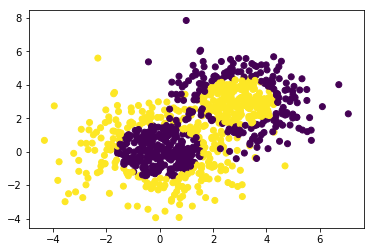

In [94]:
plt.scatter(X[:,0],X[:,1],c=y)

### 模型预测后的图形

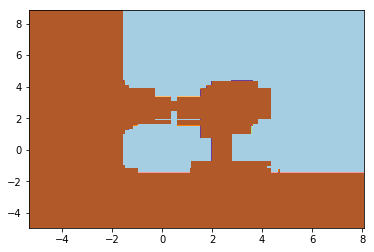

In [95]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1

#划分图形网格数据
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

#np.c_是把多个一维数组拼成一个多列的二维数组(列数同一维数组个数)
z=bdt.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
# 画网格图
plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
plt.show()

## 重要参数
- n_estimators 和 learning_rate 是此消彼长的作用，最优的模型是找这两个参数的平衡点

# AdaBoost回归器
- 重要参数
- base_estimator:弱分类器，默认是DecisionTreeRegressor(max_depth=3)
- n_estimators:默认为50，弱学习器最大迭代次数；不宜过大不宜过小
- learning_rate:每个弱学习器权重缩减系数，和n_estimators一起调参
- loss:默认linear即可
- random_sate:随机数种子

## 导入包和数据

In [102]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor         #导入决策树回归实例化方法
from sklearn.ensemble import AdaBoostRegressor         #导入AdaBoost回归器
from sklearn.model_selection import train_test_split

In [101]:
#创造数据集
rng=np.random.RandomState(1)
X=np.linspace(0,6,10000).reshape(-1,1)  #生成1列多行的二维数组，
# np.linspace(0,6,100).reshape(1,-1)是生成1行多列的二维数组

y=np.sin(X).ravel()+np.sin(6*X).ravel()+rng.normal(0, 0.1, X.shape[0])

## 划分数据集

In [103]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=rng)

## 建模

In [114]:
reg=AdaBoostRegressor(DecisionTreeRegressor(max_depth=6) #通过学习曲线得出max_depth最优为6
                      ,n_estimators=300,random_state=rng)

reg=reg.fit(Xtrain,Ytrain)

reg.score(Xtest,Ytest)

0.9883225777706585

# 线性SVM
- 支持向量机数学原理太高深，我们就用sklearn简单演示其实现过程
- 可视化我们的决策边界，支持向量，以及决策边界平行的两个超平面。

## 导入模块、包和数据

In [135]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.svm import SVC                     #导入支持向量机包

## 实例化数据集，可视化数据集

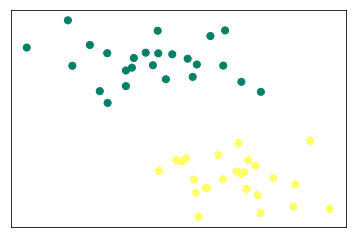

In [178]:
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plt.xticks([])   #隐藏刻度
plt.yticks([])   #隐藏刻度
plt.show()

## 定义SVC可视化函数

In [179]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax=plt.gca()                 #获取当前的子图，如果不存在，则创建新的子图
    
    #获取平面上两条坐标轴的最大值和最小值
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    #在最大值和最小值之间形成30个规律的数据，并生成网格
    x=np.linspace(xlim[0],ylim[1],100)
    y=np.linspace(ylim[0],ylim[1],100)
    
    X,Y=np.meshgrid(x,y)    
    #使用meshgrid函数将两个一维向量转换为特征矩阵
    #若y.shape=(a,b)，x.shape=(c,d)
    #X,Y的shape一致，则行数为a*b,列数为c*d;X的数据是每一行一致都是原x的元素；Y的数据是每一列一致都是原y的元素
    
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    #其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
    #xy就是已经形成的网格，它是遍布在整个画布上的密集的点
    
    
    P=model.decision_function(xy).reshape(X.shape)
    #返回每个输入的样本所对应的到决策边界的距离
    #然后再将这个距离转换为X的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
    
    #画决策边界和平行于决策边界的超平面
    #contour 是画等高线方法
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

## 建模并画图

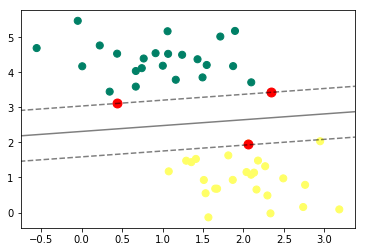

In [180]:
clf=SVC(kernel='linear').fit(X,y)
support_vectors_data=clf.support_vectors_     #返回支持向量信息
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plt.scatter(support_vectors_data[:,0],support_vectors_data[:,1],s=80,c='r')
plot_svc_decision_function(clf)

### 重要属性

In [183]:
clf.support_vectors_ 
#返回支持向量信息

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [184]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

### 重要方法

In [185]:
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [186]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

1.0

# 非线性SVM画3D图

## 导入包和数据

In [188]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles        #导入环形数据集
from sklearn.svm import SVC                      #导入支持向量机包
from mpl_toolkits import mplot3d                 #导入3D绘图包
from ipywidgets import interact,fixed            #导入3D图交互参数包:互动包和修复包

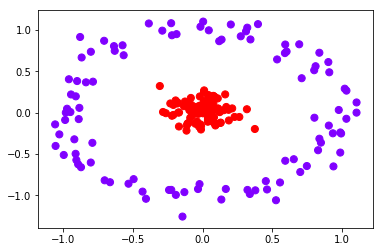

In [189]:
X,y= make_circles(n_samples=200,factor=0.1,noise=0.1,random_state=10)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')  #查看数据分布

## 画三维图

In [193]:
#定义画3D图函数
def plot_3D(elev=30,azim=30,x=X,y=y):
    r=np.exp(-(x**2).sum(1))  
    #作为数据的第三维度来将数据升维的过程，被称为“核变换”，即是将数据投影到高维空间中，
    #以寻找能够将数据完美分割的超平面，即是说寻找能够让数据线性可分的高维空间。
    ax=plt.subplot(projection='3d')
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)   #显示3维空间，elev是垂直角度，azim是横向角度
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()
    
interact(plot_3D,elev=[0,30],azip=(-180,180),x=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

# SVM 不同核函数对比
- 重要参数——kernel
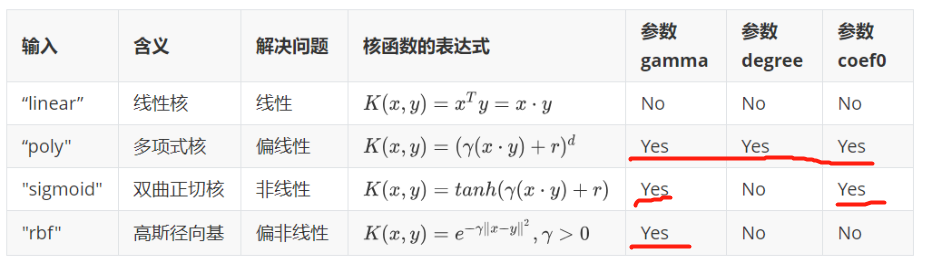

## 导入库、包和数据

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap               #导入颜色包
from sklearn.svm import SVC
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification  
#环形数据集/月牙数据集/斑点数据集/线性可分分类数据


In [195]:
#创建数据集

n=500       
#设定样本数

#把各类数据集封装在列表中
datas=[
    make_moons(n_samples=n,noise=0.2,random_state=0),
    make_circles(n_samples=n,noise=0.2,factor=0.5,random_state=1),
    make_blobs(n_samples=n,centers=2,random_state=5),
    make_classification(n_samples=n,n_features=2
                        ,n_informative=2,n_redundant=0
                        ,random_state=5)
]

## 绘图并比较各核函数效果

D:\tool\anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


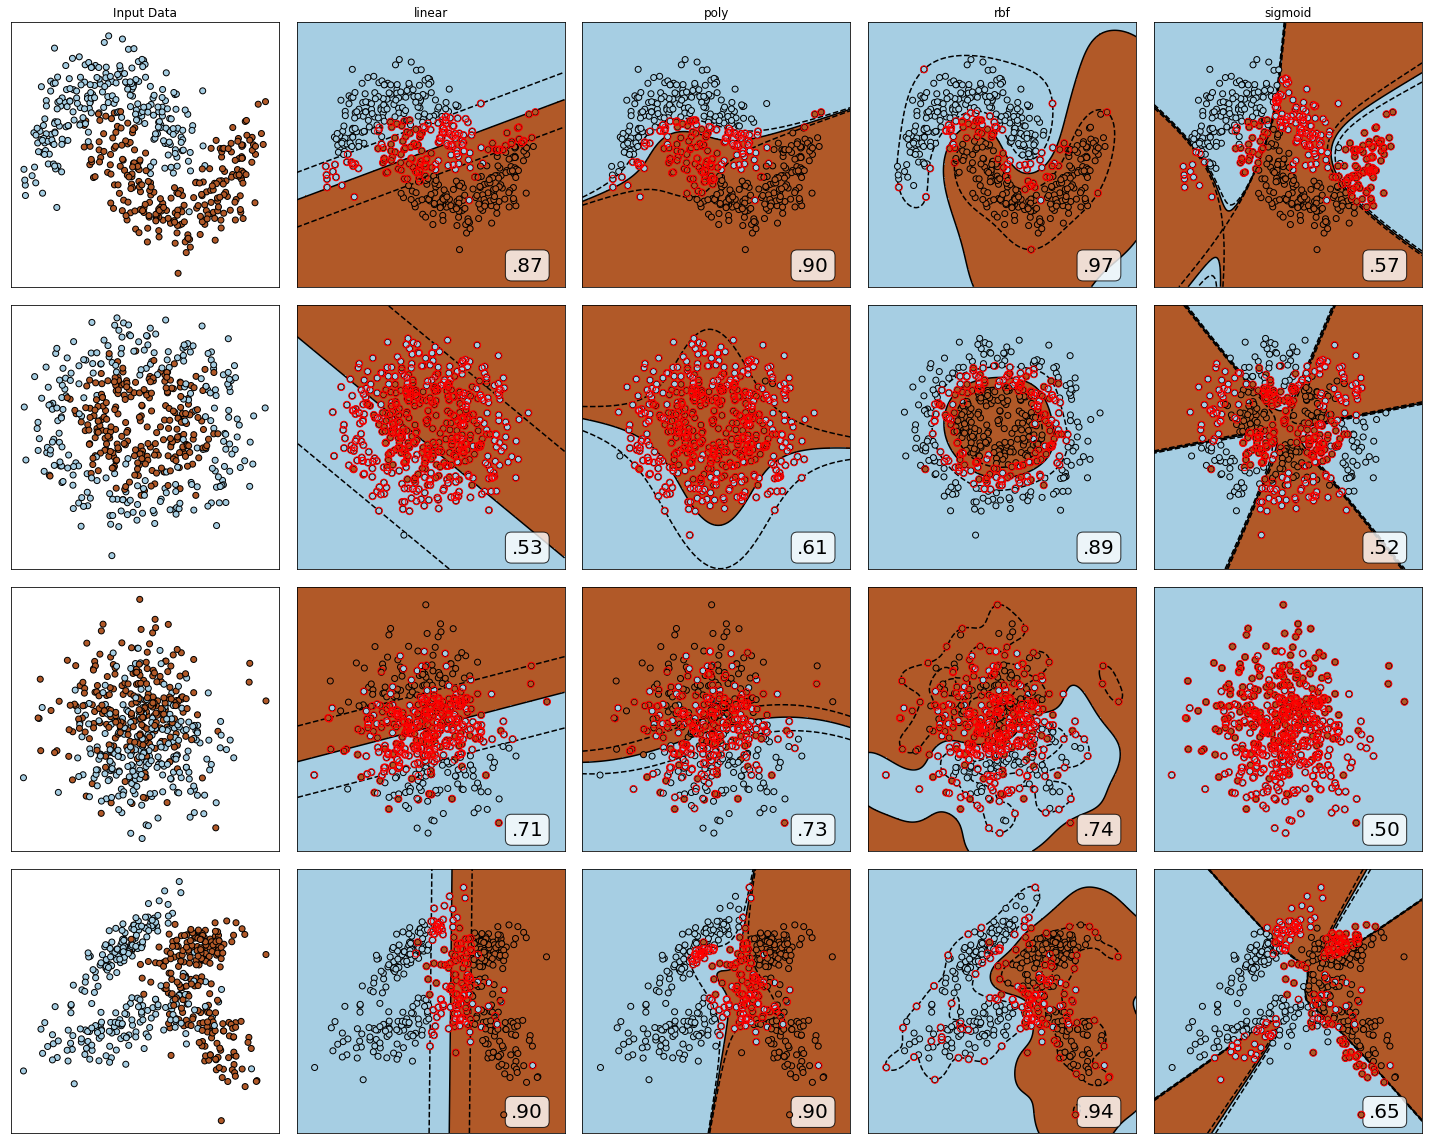

In [249]:
kernels=['linear','poly','rbf','sigmoid']
#定义核种类

#构建子图
nrows=len(datas)
ncols=len(kernels)+1
fig,axes=plt.subplots(nrows,ncols,figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt,(x,y) in enumerate(datas):
    
    #在图像中的第一列，放置原数据的分布
    ax=axes[ds_cnt,0]
    if ds_cnt==0:
        ax.set_title('Input Data')
    ax.scatter(x[:,0],x[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks([])
    ax.set_yticks([])
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_index,kernel in enumerate(kernels):
        
        #定义子图位置
        ax=axes[ds_cnt,est_index+1]
        #建模
        clf=SVC(kernel=kernel,gamma=2).fit(x,y)
        score=clf.score(x,y)
        
        #绘制图像本身分布的散点图
        ax.scatter(x[:,0],x[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=50,facecolors='none'
                   ,zorder=15,edgecolors='r')
        
        #绘制决策边界
        x_min,x_max=x[:,0].min()-0.5,x[:,0].max()+0.5
        y_min,y_max=x[:,1].min()-0.5,x[:,1].max()+0.5
        
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        xx,yy=np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        
        #np.c_，类似于np.vstack的功能
        z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
        
        #填充等高线不同区域的颜色
        ax.pcolormesh(xx,yy,z>0,cmap=plt.cm.Paired)
        
        #绘制等高线
        ax.contour(xx,yy,z,colors=['k','k','k']
                  ,linestyles=['--','-','--']
                  ,levels=[-1,0,1])
        
        #设定坐标轴为不显示
        ax.set_xticks([])
        ax.set_yticks([])
        
        #将标题放在第一行的顶上
        if ds_cnt==0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数
        ax.text(0.92,0.06,('%.2f'%score).lstrip('0')
               ,size=20      #字体的大小
               ,bbox=dict(boxstyle='round',alpha=0.8,facecolor='white')
                #为分数添加一个白色的格子作为底色
               ,transform=ax.transAxes   #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               ,horizontalalignment='right'       # 位于坐标轴的右边
                
               )
plt.tight_layout()
plt.show()

In [233]:
a

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [234]:
b

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

array([[1, 1],
       [2, 2],
       [3, 3]])

In [239]:
b

2

# 调参基本思想总结
- 新手两步走：第一步找目标——提升某个模型评估指标；第二步分析影响因素并解决
- 高手，多依赖于经验：非常正确的调参思路和方法；对模型评估指标的理解；对数据的感觉和经验；用洪荒之力去不断地尝试
- 记住，数据决定模型的上限，调参是为接近上限而为之。数据在预处理过程中出来的很好，通过调参无法达到期望，果断换复杂模型处理
- 实际操作时，一般不使用网格搜索所有参数一起调参，耗时太长。一般是通过学习曲线，一个参数一个参数调整，从最重要的参数开始逐级调参。并不是一致做下去，一般直到下一个参数效果不大为止
- 接下来用随机森林调参做例子演示。我们想要提升的是模型在未知数据上的准确率（由score或oob_score_来衡量）。我们用来衡量模型在未知数据上的准确率的指标，叫做泛化误差（Genelization error）。


## 导入包和数据

In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import GridSearchCV      #需要用网格搜索调整某个参数是可以使用
from sklearn.model_selection import train_test_split


In [118]:
data=load_breast_cancer()
data.data.shape

(569, 30)

## 划分数据集

In [120]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.data,data.target,
                                           test_size=0.3,random_state=90)

## 先初步建模

In [123]:
rfc_1=RandomForestClassifier(n_estimators=100,random_state=90)
score_train_pre=cross_val_score(rfc_1,Xtrain,Ytrain,cv=10).mean()

score_train_pre

0.96

## 使用学习曲线找最优参数

### 先调n_estimators

#### 先粗略调n_estimators

最高score: 0.9674999999999999 最优n_estimators: 131


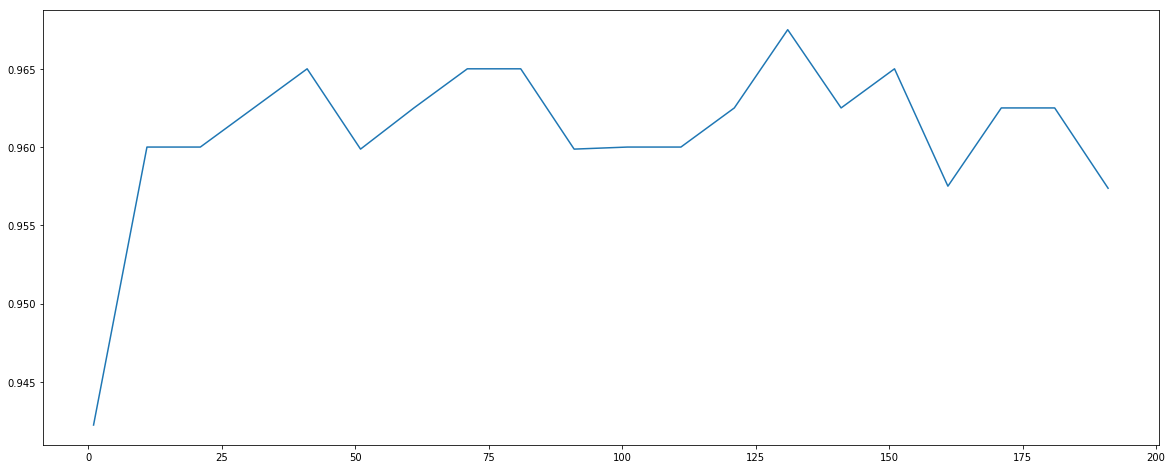

In [124]:
score_train = []
indexs=[]
for i in range(1,201,10):
    rfc=RandomForestClassifier(n_estimators=i,random_state=90)
    score=cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    score_train.append(score)
    indexs.append(i)

#打印出最高score和最优n_estimators，并绘制学习曲线
print('最高score:',max(score_train),'最优n_estimators:',indexs[score_train.index(max(score_train))])
plt.figure(figsize=(20,8))
plt.plot(range(1,201,10),score_train)
plt.show()

#### 进一步细化学习曲线
- 把范围缩小寻找

最高score: 0.9674999999999999 最优n_estimators: 127


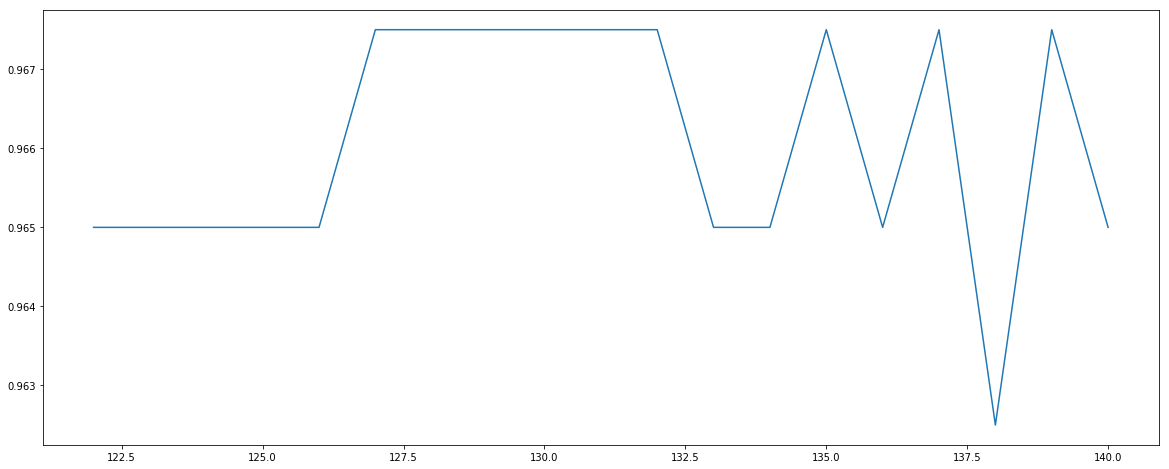

In [129]:
score_train = []
indexs=[]
for i in range(122,141):
    rfc=RandomForestClassifier(n_estimators=i,random_state=90)
    score=cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    score_train.append(score)
    indexs.append(i)

#打印出最高score和最优n_estimators，并绘制学习曲线
print('最高score:',max(score_train),'最优n_estimators:',indexs[score_train.index(max(score_train))])
plt.figure(figsize=(20,8))
plt.plot(range(122,141),score_train)
plt.show()

### 调整max_depth
- 按照参数对模型整体准确率的影响程度,max_depth是最重要的

最高score: 0.97 最优max_depth: 7


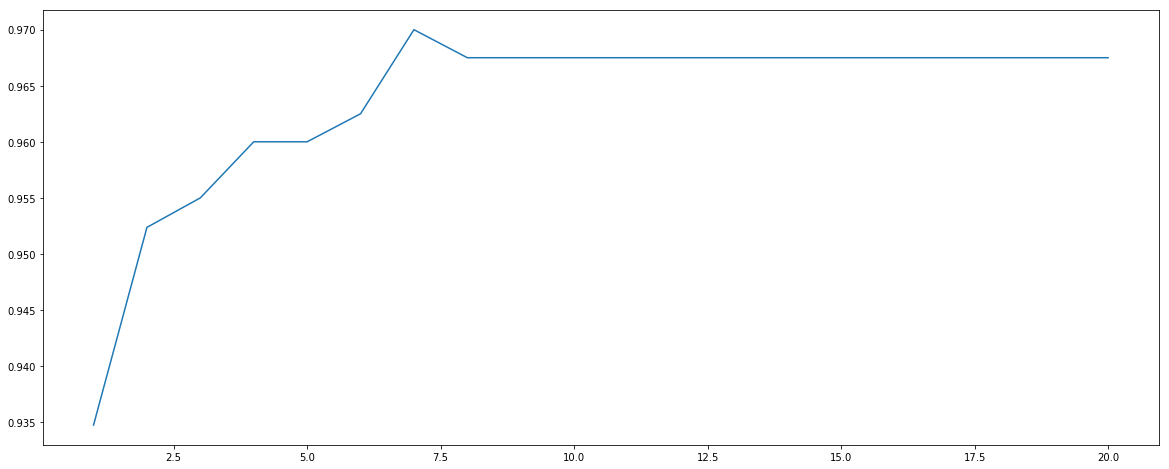

In [130]:
score_train = []
indexs=[]
for i in range(1,21):
    rfc=RandomForestClassifier(n_estimators=127,max_depth=i,random_state=90)
    score=cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    score_train.append(score)
    indexs.append(i)

#打印出最高score和最优max_depth，并绘制学习曲线
print('最高score:',max(score_train),'最优max_depth:',indexs[score_train.index(max(score_train))])
plt.figure(figsize=(20,8))
plt.plot(range(1,21),score_train)
plt.show()

### 调整max_features

最高score: 0.97 最优max_features: 5


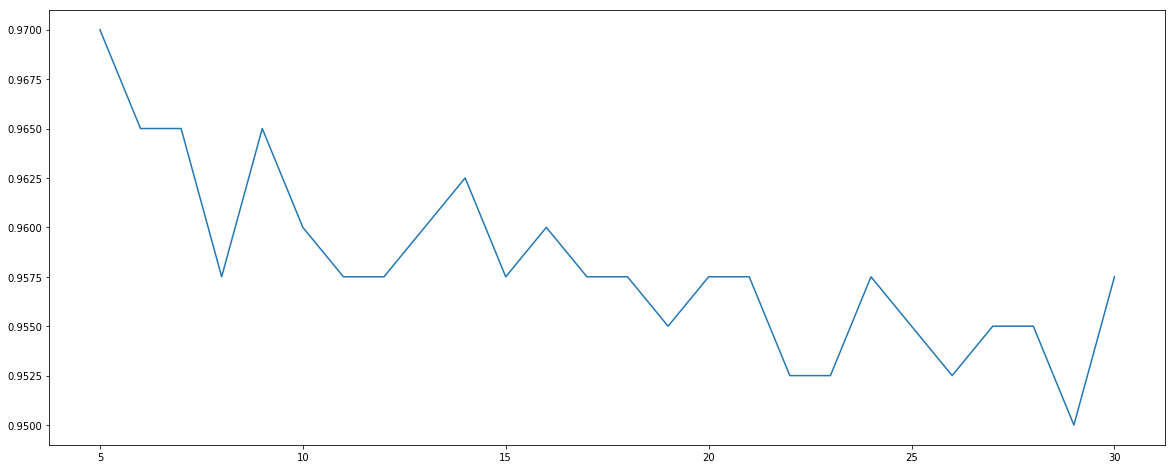

In [131]:
score_train = []
indexs=[]
for i in range(5,31):
    rfc=RandomForestClassifier(n_estimators=127,max_depth=7,max_features=i,random_state=90)
    score=cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    score_train.append(score)
    indexs.append(i)

#打印出最高score和最优max_features，并绘制学习曲线
print('最高score:',max(score_train),'最优max_features:',indexs[score_train.index(max(score_train))])
plt.figure(figsize=(20,8))
plt.plot(range(5,31),score_train)
plt.show()
"""
发现得分和前面一致

前面用max_depth往左推，现在用max_features往
右推，泛化误差都增加，这说明模型本身已经处于泛化误差最低点，已经达到了模型的预测上限，没有
参数可以左右的部分了。剩下的那些误差，是噪声决定的，已经没有方差和偏差的舞台了。

实际操作时，到这步可以停止调参。可以确定两个最优参数是n_estimators=127和max_depth=7
"""

### 优化模型

In [132]:
score_test_pre=cross_val_score(rfc_1,Xtest,Ytest,cv=10).mean()

In [133]:
rfc_best=RandomForestClassifier(n_estimators=127,max_depth=7
                               ,random_state=90)
rfc_best=rfc_best.fit(Xtrain,Ytrain)

score_train_best=cross_val_score(rfc_best,Xtrain,Ytrain,cv=10).mean()
score_test_best=cross_val_score(rfc_best,Xtest,Ytest,cv=10).mean()

print('原模型准确性：',score_train_pre,'优化后模型准确性：'
      ,score_train_best,'二者相差：',score_train_best-score_train_pre)

print('原模型泛化能力：',score_test_pre,'优化后模型泛化能力：'
      ,score_test_best,'二者相差：',score_test_best-score_test_pre)

"""
因我们的数据比较完美，所以调参后的模型提升效果不明显
"""

原模型准确性： 0.96 优化后模型准确性： 0.97 二者相差： 0.010000000000000009
原模型泛化能力： 0.9178513071895426 优化后模型泛化能力： 0.9241013071895425 二者相差： 0.006249999999999978


# User CF——基于用户的协同过滤

## 导包与数据

In [1]:
import numpy as np
import pandas as pd 


In [237]:
import os
os.chdir(r'E:\Data analysis\CDA\learning\0、python自己练习\6、机器学习\data\推荐系统')

In [3]:
#读入数据
df=pd.read_csv('example.txt',header=None)

#修改列名
df.columns=['用户id','物品id','喜好程度']

In [5]:
df.head()

,用户id,物品id,喜好程度
0,1,1,4
1,1,2,3
2,1,5,5
3,2,1,5
4,2,3,4


In [6]:
df.shape

(17, 3)

## 根据用户id和物品id构建rating矩阵

In [11]:
# 使用 pivot_table函数
# 用户id作为行索引, 物品id作为列索引, 统计对应用户和物品之间的相关 喜好程度值
df_pivot=df.pivot_table(index='用户id',columns='物品id',values='喜好程度')

df_pivot
# 有值的代表该用户对该物品有评分
# 没值的代表该用户没有对该物品评过分

物品id,1,2,3,4,5,6
用户id,,,,,,
1,4.0,3.0,NaN,NaN,5.0,NaN
2,5.0,NaN,4.0,NaN,4.0,NaN
3,4.0,NaN,5.0,3.0,4.0,NaN
4,NaN,3.0,NaN,NaN,NaN,5.0
5,NaN,4.0,NaN,NaN,NaN,4.0
6,NaN,NaN,2.0,4.0,NaN,5.0


In [13]:
# 用户个数
df_pivot.shape[0]

6

In [14]:
# 物品个数
df_pivot.shape[1]

6

## 将数据中的空值填充为0

In [15]:
freq=df_pivot.fillna(0)
freq

物品id,1,2,3,4,5,6
用户id,,,,,,
1,4.0,3.0,0.0,0.0,5.0,0.0
2,5.0,0.0,4.0,0.0,4.0,0.0
3,4.0,0.0,5.0,3.0,4.0,0.0
4,0.0,3.0,0.0,0.0,0.0,5.0
5,0.0,4.0,0.0,0.0,0.0,4.0
6,0.0,0.0,2.0,4.0,0.0,5.0


In [17]:
freq_matrix =freq.values
freq_matrix

array([[4., 3., 0., 0., 5., 0.],
       [5., 0., 4., 0., 4., 0.],
       [4., 0., 5., 3., 4., 0.],
       [0., 3., 0., 0., 0., 5.],
       [0., 4., 0., 0., 0., 4.],
       [0., 0., 2., 4., 0., 5.]])

## 使用余弦相似度计算相似度矩阵
在sklearn中有自带的余弦相似度计算函数

In [100]:
#求相关度方法一：
def get_cos_similar(freq_df): #计算余弦相关系数函数
    import numpy as np
    result_=[]
    for i in range(freq_df.shape[0]):
        l_1=[]
        for j in range(freq_df.shape[0]):            
            a=freq_df[i,:]
            b=freq_df[j,:]
            a_dot_b=np.dot(a,b)               #计算a向量和b向量的点积
            a_mode=np.sqrt(np.sum(a**2))      #计算a向量模
            b_mode=np.sqrt(np.sum(b**2))      #计算b向量模
            ab_power=a_mode*b_mode            # 计算a向量模和b向量模乘积
            if np.sum(a == b)==freq_df.shape[0]:
                l_1.append(0.0)
            elif ab_power==0:
                l_1.append(0.0)
            else:
                l_1.append(a_dot_b/ab_power)
        result_.append(l_1)
    return np.array(result_)

In [103]:
user_similar=get_cos_similar(freq_matrix)
user_similar

array([[0.        , 0.74926865, 0.62667956, 0.21828206, 0.3       ,
        0.        ],
       [0.74926865, 0.        , 0.91301651, 0.        , 0.        ,
        0.1579597 ],
       [0.62667956, 0.91301651, 0.        , 0.        , 0.        ,
        0.40368671],
       [0.21828206, 0.        , 0.        , 0.        , 0.9701425 ,
        0.63913749],
       [0.3       , 0.        , 0.        , 0.9701425 , 0.        ,
        0.52704628],
       [0.        , 0.1579597 , 0.40368671, 0.63913749, 0.52704628,
        0.        ]])

In [19]:
# 使用余弦相似度函数计算相关度 方法二
# from sklearn.metrics.pairwise import cosine_similarity
# user_similar=cosine_similarity(freq_matrix)
# user_similar

## 先求第二个用户的推荐信息

### 我们可以用这种方法提取出第2个用户的评分向量

In [33]:
user_2_action=freq_matrix[1,:]   #用户id=2对所有商品的行为评分
user_2_action

array([5., 0., 4., 0., 4., 0.])

In [141]:
user_2_item_mean=user_2_action.sum()/user_2_action[user_2_action!=0].size
user_2_item_mean

4.333333333333333

### 可以用这种方法提取出所有用户对第4个物品的的评分向量

In [38]:
item_2_action=freq_matrix[:,3]      #物品id=4得到的所有用户评分  
item_2_action

array([0., 0., 3., 0., 0., 4.])

### 找出和该用户最相似的三个用户

In [167]:
k=3  #初始化近邻值
similar_2_index=np.argsort(user_similar[1])[-k:]
similar_2_index

array([5, 0, 2], dtype=int64)

### 求第四个商品相似用户的推荐指数

In [169]:
score = 0
weight = 0

for i in similar_2_index:
    # 现在我们有了三个用户, 我们要计算的是, 这三个用户对物品的推荐分数 ,然后还要进行加权
    if item_2_action[i] !=0:
        # 如果等于0 说明什么呢, 说明当前这个用户没有对这个物品评分,也就没有必要计算了
        # 如果不等于０　，则计算这个用户的推荐值
        user_id_action_for_i=freq_matrix[i,:]  #index=i的用户评分
        
        # 计算该用户的评分平均值
        user_id_mean_for_i=np.sum(user_id_action_for_i)/user_id_action_for_i[user_id_action_for_i!=0].size
        # 计算index=i用户的推荐分数
        #  user_similar[1][i] 这个提取出这两个用户的相似度,作为权重
        score+=user_similar[1][i]*(item_2_action[i]-user_id_mean_for_i)
        weight+=abs(user_similar[1][i])
user_2_item_mean+score/weight

3.5299884336084046

## 推广到任意用户任意商品的推荐系数计算

In [177]:
#构建一个基于用户和物品的推荐
def Recommendation_mean(user_id,item_id,similar,k=20):
    """减去平均数的计算方法"""
    score=0
    weight=0
    user_id_action=freq_matrix[user_id,:]         #用户user_id 对所有商品的行为评分
    item_id_action=freq_matrix[:,item_id]         #物品item_id 得到的所有用户评分 
    
    user_id_similar=similar[user_id,:]             #用户user_id 对所有用户的相似度
    similar_index=np.argsort(user_id_similar)[-k:] #最相似的k个用户的index（除了自己）
    user_id_i_mean=np.sum(user_id_action)/user_id_action[user_id_action!=0].size
    #计算该用户user_id的评分平均值
    
    #通过最相似的k个用户计算物品item_id推荐分值
    for j in similar_index:
        if item_id_action[j]!=0:
            # 如果不等于０　，则计算这个用户的推荐值
            user_id_j_action=freq_matrix[j,:]
            
            # 计算该用户的评分平均值
            user_id_j_mean=np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
           
            #  user_id_similar[j] 这个提取出这两个用户的相似度,作为权重
            score+=user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            #print(score)
            weight+=abs(user_id_similar[j])
            #print(weight)
    if weight==0:
        result=0
    else:
        result=user_id_i_mean+score/weight
    return result

In [181]:
Recommendation_mean(1,3,user_similar,3)  #验证函数结果

3.5299884336084046

In [170]:
#构建一个基于用户和物品的推荐
def Recommendation(user_id,item_id,similar,k=10):
    """不减平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  

    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-k:]  #最相似的k个用户的index（除了自己）
    
    for j in similar_index :
        if item_id_action[j]!=0:
            user_id_j_action = freq_matrix[j,:]

            score += user_id_similar[j]*(item_id_action[j])
#             print(score)
            weight += abs(user_id_similar[j])
#             print(weight)

    if weight==0:  
        return 0
    else:
        return score/float(weight)

## 构建预测函数

In [178]:
#构建预测函数
def predict_mean(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count=freq_matrix.shape[0]    #用户数
    item_count=freq_matrix.shape[1]    #商品数
    predic_matrix=np.zeros((user_count,item_count))  #初始化全零矩阵
    
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id]==0:
                predic_matrix[user_id,item_id]=Recommendation_mean(user_id,item_id,user_similar)
    return predic_matrix

In [180]:
pd.DataFrame(predict_mean(user_similar)) #验证函数结果

,0,1,2,3,4,5
0,0.000000,0.000000,4.273937,3.000000,0.000000,4.421165
1,0.000000,3.333333,0.000000,3.529988,0.000000,5.666667
2,0.000000,3.000000,0.000000,0.000000,0.000000,5.333333
3,4.000000,0.000000,2.333333,4.333333,5.000000,0.000000
4,4.000000,0.000000,2.333333,4.333333,5.000000,0.000000
5,3.854163,3.118608,0.000000,0.000000,3.572919,0.000000


## 构建最终的推荐函数

In [182]:
user_prediction_matrix=predict_mean(user_similar)  #先获得预测结果

In [230]:
#通过预测结果获取每个用户前n推荐列表
def get_recommendation(user_prediction_matrix,n=5):
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df=pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)
    # 将数据进行转换
    recommendation_df=recommendation_df.stack().reset_index()
    recommendation_df.rename(columns={0:'推荐指数'},inplace=True)
    # 根据用户ID列进行分组
    grouped=recommendation_df.groupby('用户id')
    #得到分组后的前n个数据
    topk=grouped.apply(lambda x:x.sort_values('推荐指数',ascending=False)[:n])

    #去除多重索引方法一
    topk=topk.drop(['用户id'],axis=1).reset_index().drop(['level_1'],axis=1)

    #去除多重索引方法二
    # #删除掉用户ID列
    # topk=topk.drop(['用户id'],axis=1)
    # #删除掉多余的索引
    # topk.index=topk.index.droplevel(1)
    # # 索引重排
    # topk.reset_index(inplace=True)
    return topk

## 输出最终结果并保存至csv文件

In [232]:
recommendation_data=get_recommendation(user_prediction_matrix,5)

In [241]:
if not os.path.exists('save_result'):
    os.makedirs('save_result') #文件夹不存在，创建文件夹

recommendation_data.to_csv('save_result/recommendation_data.csv',index=False,encoding='GBK')

In [233]:
recommendation_data

,用户id,物品id,推荐指数
0,1,6,4.421165
1,1,3,4.273937
2,1,4,3.000000
3,1,1,0.000000
4,1,2,0.000000
5,2,6,5.666667
6,2,4,3.529988
7,2,2,3.333333
8,2,1,0.000000
9,2,3,0.000000


## 完整代码整理

### 导入库和数据

In [20]:
import numpy as np
import pandas as pd

In [23]:
import os
os.chdir(r'E:\Data analysis\CDA\learning\0、python自己练习\6、机器学习\data\推荐系统')

In [24]:
#读入数据
df=pd.read_csv('example.txt',header=None)
#修改列名
df.columns=['用户id','物品id','喜好程度']

### 定义一个User CF算法

In [26]:
#定义一个用户物品连接矩阵
def get_ratingmatix(df,index_,column_,value_=None):
    """df:是DataFrame对象；
   index_是作为索引的特征名
   column_是作为列的特征名称
   value_是汇总的列名"""
    try:
        df_pivot=df.pivot_table(index=index_,columns=column_,values=value_).fillna(0)
        result_matix=df_pivot.values
    except Exception as e:
        result_matix=e.args
    return result_matix

#定义余弦相关系数计算函数
def get_cos_similar(freq_df):
    """求余弦相关系数
    freq_df是get_ratingmatix返回的结果
    """
    import numpy as np
    result_=[]
    for i in range(freq_df.shape[0]):
        l_1=[]
        for j in range(freq_df.shape[1]):            
            a=freq_df[i,:]
            b=freq_df[j,:]
            a_dot_b=np.dot(a,b)               #计算a向量和b向量的点积
            a_mode=np.sqrt(np.sum(a**2))      #计算a向量模
            b_mode=np.sqrt(np.sum(b**2))      #计算b向量模
            ab_power=a_mode*b_mode            # 计算a向量模和b向量模乘积
            if np.sum(a == b)==freq_df.shape[1]:
                l_1.append(0.0)
            elif ab_power==0:
                l_1.append(0.0)
            else:
                l_1.append(a_dot_b/ab_power)
        result_.append(l_1)
    return np.array(result_)

#构建一个基于用户和物品的推荐
def Recommendation_mean(freq_matrix,user_id,item_id,similar,k=20):
    """减去平均数的计算方法:
    freq_matrix是由get_ratingmatix函数返回的结果
    similar是由get_cos_similar函数返回的结果
    k初始化为20，前20近邻
    """
    score=0
    weight=0    
    user_id_action=freq_matrix[user_id,:]         #用户user_id 对所有商品的行为评分
    item_id_action=freq_matrix[:,item_id]         #物品item_id 得到的所有用户评分 
    
    user_id_similar=similar[user_id,:]             #用户user_id 对所有用户的相似度
    similar_index=np.argsort(user_id_similar)[-k:] #最相似的k个用户的index（除了自己）
    user_id_i_mean=np.sum(user_id_action)/user_id_action[user_id_action!=0].size
    #计算该用户user_id的评分平均值
    
    #通过最相似的k个用户计算物品item_id推荐分值
    for j in similar_index:
        if item_id_action[j]!=0:
            # 如果不等于０　，则计算这个用户的推荐值
            user_id_j_action=freq_matrix[j,:]
            
            # 计算该用户的评分平均值
            user_id_j_mean=np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
           
            #  user_id_similar[j] 这个提取出这两个用户的相似度,作为权重
            score+=user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            #print(score)
            weight+=abs(user_id_similar[j])
            #print(weight)
    if weight==0:
        result=0
    else:
        result=user_id_i_mean+score/weight
    return result

#构建预测函数
def predict_mean(freq_matrix,user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵
    freq_matrix是由get_ratingmatix函数返回的结果
    user_similar是由get_cos_similar函数返回的结果
    """   
    user_count=freq_matrix.shape[0]    #用户数
    item_count=freq_matrix.shape[1]    #商品数
    predic_matrix=np.zeros((user_count,item_count))  #初始化全零矩阵
    
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id]==0:
                predic_matrix[user_id,item_id]=Recommendation_mean(freq_matrix,user_id,item_id,user_similar)
    return predic_matrix

#获取每个用户前n推荐列表
def get_recommendation(df,n=5):
    #先获取rating矩阵数据
    freq_matix=get_ratingmatix(df,'用户id','物品id','喜好程度')
    #通过rating矩阵数据获取用户间的相似度
    user_similar=get_cos_similar(freq_matix)
    #获取用户预测数据
    user_prediction_matrix=predict_mean(freq_matix,user_similar)
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df=pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)
    # 将数据进行转换
    recommendation_df=recommendation_df.stack().reset_index()
    recommendation_df.rename(columns={0:'推荐指数'},inplace=True)
    # 根据用户ID列进行分组
    grouped=recommendation_df.groupby('用户id')
    #得到分组后的前n个数据
    topk=grouped.apply(lambda x:x.sort_values('推荐指数',ascending=False)[:n])

    #去除多重索引方法一
    topk=topk.drop(['用户id'],axis=1).reset_index().drop(['level_1'],axis=1)

    #去除多重索引方法二
    # #删除掉用户ID列
    # topk=topk.drop(['用户id'],axis=1)
    # #删除掉多余的索引
    # topk.index=topk.index.droplevel(1)
    # # 索引重排
    # topk.reset_index(inplace=True)
    return topk

### 获取结果并下载文件

In [258]:
recommendation_data=get_recommendation(df,2) #n是随着业务需求调整
if not os.path.exists('save_result'):
    os.makedirs('save_result') #文件夹不存在，创建文件夹

recommendation_data.to_csv('save_result/recommendation_data.csv',index=False,encoding='GBK')

In [259]:
get_recommendation(df,5)

,用户id,物品id,推荐指数
0,1,6,4.421165
1,1,3,4.273937
2,1,4,3.000000
3,1,1,0.000000
4,1,2,0.000000
5,2,6,5.666667
6,2,4,3.529988
7,2,2,3.333333
8,2,1,0.000000
9,2,3,0.000000


# 基于物品的协同过滤——Item CF
- 基于物品的CF的原理和基于用户的CF类似，只是在计算邻居时采用物品本身，而不是从用户的角度，即基于用户对物品的偏好找到相似的物品
- 用一个电商案例演示

## 导入模块和数据

In [264]:
import pandas as pd
import numpy as np

In [265]:
import os
os.chdir(r'E:\Data analysis\CDA\learning\0、python自己练习\6、机器学习\data\推荐系统')

In [266]:
orders = pd.read_csv("orders.csv")
items = pd.read_csv("Items_orders.csv")
itemProps = pd.read_csv("Items_attribute.csv",encoding='gbk')

In [271]:
pd.set_option('max_columns',100)   #设置可见列数量
orders.head().T  #查看数据

,0,1,2,3,4
订单编号,21407300627014900,24270488269081200,21402600386365500,21398820349555700,21446781606162100
买家会员名,1425,2163,375,2618,2012
买家支付宝账号,yorzikyA6C,AC870BA5860,AC7574B65A0,A807C90766A,A505588565B
买家应付货款,58.51,15.7,7.9,4.81,23.92
买家应付邮费,0,5,5,5,5
买家支付积分,0,0,0,0,0
总金额,58.51,20.7,12.9,9.81,28.92
返点积分,0,0,0,0,0
买家实际支付金额,58.51,20.7,12.9,9.81,28.92
买家实际支付积分,0,0,0,0,0


In [272]:
items.head()

,订单编号,标题,价格,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态,商家编码
0,21407300627014900,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,12,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426
1,21407300627014900,特价5号AA普通干电池 电动玩具配件 厂家直销批,1.00,20,HT-5H0094,NaN,NaN,NaN,交易成功,HT-5H0094
2,21407300627014900,大号泡泡棒沙滩小铲子工具泡泡枪公园吹泡泡户外亲子游戏玩具热卖,1.20,16,GC018005,NaN,NaN,NaN,交易成功,GC018005
3,21407300627014900,特价正品7号电池儿童电动玩具电源配件 厂家直销1元4节地摊货批发,1.00,10,HT-7H0093,NaN,NaN,NaN,交易成功,HT-7H0093
4,21407300627014900,儿童沙滩玩具水枪 宝宝玩水玩具户外洗澡游泳漂流戏大号水枪批发,6.79,1,GC080003,套餐类型：标准配置;颜色分类：33000蓝色水枪,NaN,NaN,交易成功,GC080003


In [273]:
itemProps.head()

,宝贝ID,标题,价格,玩具类型,适用年龄,品牌
0,537396783238,创意新款回力小车惯性坦克 军事儿童玩具模型地摊货源玩具车批发,8.90,塑胶玩具,"3岁,4岁,5岁,6岁",3
1,36286235128,2017热卖大号仿真惯性挖土机儿童益智礼品创意义乌地摊货玩具批发,3.90,其它玩具,"3岁,4岁,5岁,6岁",3
2,35722000205,创意发光球闪光透明发光水晶弹力球儿童小玩具 夜市地摊货源批发,1.65,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁",3
3,550659732532,新款创意六一儿童节礼物音乐投影电动枪夜市地摊货源批发男孩玩具,9.90,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁,11岁,12岁,13岁,14岁",3
4,531877266868,发条玩具批发上链卡通动物青蛙儿童礼物宝宝玩具经典80后益智地摊,1.85,其它玩具,"3岁,4岁",3


## 将数据合并成一张表

In [274]:
orders_items = pd.merge(orders,items,on="订单编号")
#先合并orders和items清单数据

orders_items_props = pd.merge(orders_items,itemProps,on="标题")
#三表合并成一表

In [276]:
orders_items_props.head()

,订单编号,买家会员名,买家支付宝账号,买家应付货款,买家应付邮费,买家支付积分,总金额,返点积分,买家实际支付金额,买家实际支付积分,订单状态_x,买家留言,收货人姓名,收货地址,运送方式,联系电话,联系手机,订单创建时间,订单付款时间,宝贝标题,宝贝种类,物流单号,物流公司,订单备注,宝贝总数量,店铺Id,店铺名称,订单关闭原因,卖家服务费,买家服务费,发票抬头,是否手机订单,分阶段订单信息,特权订金订单id,是否上传合同照片,是否上传小票,是否代付,定金排名,修改后的sku,修改后的收货地址,异常信息,天猫卡券抵扣,集分宝抵扣,是否是O2O交易,退款金额,预约门店,标题,价格_x,购买数量,外部系统编号,商品属性,套餐信息,备注,订单状态_y,商家编码,宝贝ID,价格_y,玩具类型,适用年龄,品牌
0,21407300627014900,1425,yorzikyA6C,58.51,0.0,0,58.51,0,58.51,0,交易成功,NaN,33,广东省 广州市 越秀区 华乐街道环市东路华侨新村光明路28号3a楼（即原文化假日酒店，后易名...,快递,NaN,AC5CCC66557,2017/5/30 23:18,2017/5/30 23:18,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，特价5号AA普通干电池 电动玩具...,5,No:3330622150731,申通快递,NaN,59,0,0,订单未关闭,0,0元,NaN,NaN,NaN,NaN,否,否,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,12,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426,530449665002,0.58,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁",3
1,24043728806509300,882,A5BBABBB0B7,173.10,0.0,0,173.10,0,173.10,0,交易成功,NaN,2071,江苏省 淮安市 洪泽县 高良涧镇富民家园五期103栋1单元501(223100),快递,NaN,A5B6A7559C5,2017/5/30 7:29,2017/5/30 7:29,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，创意拉线海盗船帆船好玩儿童小玩具...,38,No:3330562030158,申通快递,NaN,46,0,0,订单未关闭,0,0元,NaN,手机订单,NaN,NaN,否,否,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,1,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426,530449665002,0.58,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁",3
2,24043728806509300,882,A5BBABBB0B7,173.10,0.0,0,173.10,0,173.10,0,交易成功,NaN,2071,江苏省 淮安市 洪泽县 高良涧镇富民家园五期103栋1单元501(223100),快递,NaN,A5B6A7559C5,2017/5/30 7:29,2017/5/30 7:29,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，创意拉线海盗船帆船好玩儿童小玩具...,38,No:3330562030158,申通快递,NaN,46,0,0,订单未关闭,0,0元,NaN,手机订单,NaN,NaN,否,否,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,1,WY013-1SZD0425,颜色分类：大号,NaN,NaN,交易成功,WY013-1SZD0425,530449665002,0.58,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁",3
3,20885882368182100,279,csongCAA6C,82.73,0.0,0,82.73,0,82.73,0,交易成功,NaN,2522,广东省 汕尾市 城区 东涌镇政府前37号(516601),快递,NaN,A5767CA0BB9,2017/5/29 15:36,2017/5/29 15:36,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，2017新款发光手指灯创意变色孔...,3,No:71157013095431,百世快递,NaN,160,0,0,订单未关闭,0,0元,NaN,手机订单,NaN,NaN,否,否,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.68,50,WY013-1SZD0425,颜色分类：大号,NaN,NaN,交易成功,WY013-1SZD0425,530449665002,0.58,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁",3
4,20885882368182100,279,csongCAA6C,82.73,0.0,0,82.73,0,82.73,0,交易成功,NaN,2522,广东省 汕尾市 城区 东涌镇政府前37号(516601),快递,NaN,A5767CA0BB9,2017/5/29 15:36,2017/5/29 15:36,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家，2017新款发光手指灯创意变色孔...,3,No:71157013095431,百世快递,NaN,160,0,0,订单未关闭,0,0元,NaN,手机订单,NaN,NaN,否,否,否,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,发光玩具批发光纤手指灯闪光夜市热卖货源儿童玩具地摊义乌厂家,0.58,50,WY013-2SZD0426,颜色分类：小号,NaN,NaN,交易成功,WY013-2SZD0426,530449665002,0.58,其它玩具,"3岁,4岁,5岁,6岁,7岁,8岁,9岁,10岁",3


## 构建关系矩阵

In [283]:
#先提取我们需要的数据
result = orders_items_props.loc[:,["买家会员名","宝贝ID"]]

#新增一列并初始化
result['购买次数']=0  

#计算每位用户每个单品的购买次数
freq = result.groupby(["买家会员名","宝贝ID"]).count().reset_index()
freq.head()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 创建一个构建关系矩阵函数

In [ ]:
#定义一个用户物品关系矩阵
def get_ratingmatix(df,index_,column_,value_=None):
    """df:是DataFrame对象；
   index_是作为索引的特征名
   column_是作为列的特征名称
   value_是汇总的列名"""
    try:
        df_pivot=df.pivot_table(index=index_,columns=column_,values=value_).fillna(0)
        result_matix=df_pivot.values
    except Exception as e:
        result_matix=e.args
    return result_matix


## 建模

### 计算物品相似度

In [306]:
#定义余弦相关系数计算函数
def get_cos_similar(freq_df):
    """求余弦相关系数
    freq_df是关系矩阵
    """
    import numpy as np
    result_=[]
    for i in range(freq_df.shape[0]):
        l_1=[]
        for j in range(freq_df.shape[0]):            
            a=freq_df[i,:]
            b=freq_df[j,:]
            a_dot_b=np.dot(a,b)               #计算a向量和b向量的点积
            a_mode=np.sqrt(np.sum(a**2))      #计算a向量模
            b_mode=np.sqrt(np.sum(b**2))      #计算b向量模
            ab_power=a_mode*b_mode            # 计算a向量模和b向量模乘积
            if np.sum(a == b)==freq_df.shape[1]:
                l_1.append(0.0)
            elif ab_power==0:
                l_1.append(0.0)
            else:
                l_1.append(a_dot_b/ab_power)
        result_.append(l_1)
    return np.array(result_)

In [307]:
item_similar=get_cos_similar(freqMatrix.T) #计算物品间相似度

### 预测推荐系数

#### 先构建一个物品的推荐函数

In [327]:
#构建一个物品的推荐函数
def Recommendation_s(freqMatrix,uid,iid,similar,k=20):
    """减去平均数的计算方法:
    freq_matrix是用户和物品关系矩阵
    similar是物品间相似度
    k初始化为20，前20近邻    
    """
    #计算物品间相似度
    score=0            #初始化分值
    weight=0           #初始化权重
    uid_action=freqMatrix[uid,:]   #用户uid 对所有商品的行为
    iid_action=freqMatrix[:,iid]   #物品iid 得到的所有用户的行为
    
    iid_sim=similar[iid,:]          #商品iid 对所有商品的相似度
    sim_indexs=np.argsort(item_similar[1,:])[-k:]   #最相似的k个物品的index（除了自己）
    iid_i_mean=np.sum(iid_action)/iid_action[iid_action!=0].size #计算iid的平均得分
    #通过最相似的k个物品计算用户uid推荐分值
    for j in sim_indexs:
        if uid_action[j]!=0:
            #如果不等于０　，则计算这个物品的推荐值
            iid_j_action=freqMatrix[:,j]
            iid_j_mean=np.sum(iid_j_action)/iid_j_action[iid_j_action!=0].size
            # 计算该物品的平均得分
            score+=iid_sim[j]*(uid_action[j]-iid_j_mean)
            weight+=abs(iid_sim[j])
    if weight==0:
        result=0
    else:
        result=iid_i_mean+score/weight
    return result

#### 构建预测函数

In [330]:
#构建预测函数
def predict(freqMatrix,similar):
    """预测函数的功能: 传入物品间相似度和用户物品关系矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵
    similar是物品间相似度
    freq_matrix是用户和物品关系矩阵
    """
    user_cnt=freqMatrix.shape[0]            #用户数
    item_cnt=freqMatrix.shape[1]            #商品数
    pred=np.zeros((user_cnt,item_cnt))       #初始化一个全零矩阵
    for uid in range(user_cnt):
        for iid in range(item_cnt):
            if freqMatrix[uid,iid]==0:
                pred[uid,iid]=Recommendation_s(freqMatrix,uid,iid,similar)
    return pred

In [ ]:
predict(freqMatrix)

### 获得最终结果

In [309]:
#获取每个用户前n推荐列表
def get_recom(df,k=5):
    """传入DataFrame对象，计算出每位用户前k个物品推荐清单
    df是一个DataFrame对象
    k是前几个
    """ 
    #先获取关系矩阵数据
    freqMatrix=get_ratingmatix(df,"买家会员名","宝贝ID","购买次数")
    #通过关系矩阵数据获取物品间的相似度
    item_similar=get_cos_similar(freqMatrix.T)
    #获取用户预测数据
    user_prediction_matrix=predict(freqMatrix,item_similar)
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df=pd.DataFrame(user_prediction_matrix,columns=df.columns,index=df.index)
    # 将数据进行转换
    recommendation_df=recommendation_df.stack().reset_index()
    recommendation_df.rename(columns={0:'推荐指数'},inplace=True)
    # 根据用户ID列进行分组
    grouped=recommendation_df.groupby('买家会员名')
    #得到分组后的前n个数据
    topk=grouped.apply(lambda x:x.sort_values('推荐指数',ascending=False)[:n])

    #去除多重索引方法一
    topk=topk.drop(['买家会员名'],axis=1).reset_index().drop(['level_1'],axis=1)

    #去除多重索引方法二
    # #删除掉用户ID列
    # topk=topk.drop(['用户id'],axis=1)
    # #删除掉多余的索引
    # topk.index=topk.index.droplevel(1)
    # # 索引重排
    # topk.reset_index(inplace=True)
    return topk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,0.000000,0.101630,0.146662,0.127454,0.000000,0.000000,0.000000,0.095019,0.044076,0.000000,0.035081,0.019316,0.078597,0.012510,0.138458,0.022428,0.116582,0.101766,0.081524,0.000000,0.076055,0.036150,0.108590,0.075907,0.037740,0.000000,0.068067,0.028784,0.031718,0.000000,0.054937,0.056525,0.036528,0.036919,0.082572,0.040249,0.054453,0.050605,0.011751,0.035808,0.000000,0.135370,0.132228,0.031166,0.041959,0.109095,0.106149,0.042630,0.000000,0.046450,...,0.017311,0.056322,0.076342,0.107895,0.000000,0.183124,0.079652,0.087086,0.022840,0.053849,0.015353,0.017778,0.027227,0.016150,0.027227,0.000000,0.000000,0.043887,0.059400,0.057011,0.052746,0.040971,0.000000,0.024225,0.016150,0.063987,0.000000,0.000000,0.022428,0.069824,0.000000,0.017891,0.000000,0.030901,0.000000,0.032603,0.000000,0.031718,0.059339,0.000000,0.068519,0.000000,0.083918,0.000000,0.000000,0.059339,0.000000,0.0,0.0,0.0
1,0.101630,0.000000,0.130841,0.088007,0.076338,0.023473,0.053231,0.074796,0.130107,0.128446,0.176428,0.095030,0.147798,0.057443,0.116775,0.073561,0.138383,0.080107,0.111539,0.041989,0.212691,0.063236,0.130592,0.049793,0.123781,0.000000,0.080370,0.056644,0.020806,0.025950,0.048050,0.100643,0.087860,0.040363,0.093992,0.039603,0.053580,0.033195,0.077083,0.105702,0.105409,0.113017,0.028913,0.030667,0.027524,0.130499,0.069631,0.013982,0.038395,0.030470,...,0.045422,0.066503,0.075117,0.055048,0.000000,0.036037,0.104499,0.057126,0.044947,0.030278,0.055393,0.072888,0.017860,0.148316,0.035720,0.010796,0.000000,0.057578,0.014169,0.037398,0.043250,0.023516,0.029424,0.015891,0.021188,0.041974,0.062280,0.009175,0.000000,0.045803,0.050817,0.046945,0.000000,0.040541,0.076338,0.042774,0.000000,0.000000,0.000000,0.049793,0.000000,0.064931,0.036699,0.031782,0.028427,0.038925,0.055048,0.0,0.0,0.0
2,0.146662,0.130841,0.000000,0.093601,0.033930,0.037261,0.014083,0.059366,0.050486,0.069907,0.051142,0.020113,0.144043,0.023448,0.135937,0.063057,0.160706,0.086894,0.116422,0.049990,0.085865,0.052700,0.101767,0.026347,0.083836,0.049432,0.076548,0.041961,0.019817,0.024716,0.072461,0.102584,0.055787,0.030755,0.156285,0.071248,0.011340,0.042156,0.078312,0.064320,0.033465,0.105080,0.041307,0.064907,0.017477,0.144340,0.062635,0.026635,0.048759,0.090288,...,0.032447,0.039881,0.113942,0.084887,0.061169,0.068647,0.101188,0.067364,0.033296,0.041654,0.099122,0.028694,0.011340,0.070631,0.068042,0.109679,0.000000,0.070834,0.069726,0.035619,0.131818,0.028797,0.018683,0.050451,0.040361,0.047973,0.079091,0.029128,0.023354,0.038777,0.057619,0.022356,0.012358,0.045048,0.043625,0.010185,0.047985,0.000000,0.000000,0.015808,0.000000,0.025768,0.023302,0.000000,0.045125,0.012358,0.000000,0.0,0.0,0.0
3,0.127454,0.088007,0.093601,0.000000,0.033255,0.051127,0.083739,0.054306,0.062977,0.013323,0.044555,0.133394,0.114796,0.041707,0.146019,0.101478,0.111050,0.077549,0.075437,0.038108,0.091511,0.126260,0.137916,0.048203,0.071898,0.018841,0.077804,0.041127,0.030213,0.018841,0.034887,0.076919,0.040594,0.011722,0.054364,0.047923,0.000000,0.072305,0.095143,0.057559,0.006958,0.070334,0.083969,0.044531,0.039968,0.082524,0.016852,0.010152,0.055754,0.151174,...,0.008245,0.134124,0.090899,0.068517,0.019984,0.078496,0.060698,0.154057,0.021756,0.029311,0.025593,0.110074,0.025935,0.007692,0.019451,0.031354,0.050556,0.036579,0.108020,0.063357,0.081645,0.017074,0.000000,0.000000,0.030767,0.073141,0.022609,0.059952,0.010682,0.088681,0.026354,0.059649,0.000000,0.036794,0.066511,0.046584,0.015677,0.000000,0.000000,0.012051,0.032634,0.035358,0.039968,0.000000,0.030959,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.076338,0.033930,0.033255,0.000000,0.000000,0.022350,0.000000,0.036418,0.046225

## 最终代码整理

### 导入库和数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r'E:\Data analysis\CDA\learning\0、python自己练习\6、机器学习\data\推荐系统')

In [33]:
orders = pd.read_csv("orders.csv")
items = pd.read_csv("Items_orders.csv")
itemProps = pd.read_csv("Items_attribute.csv",encoding='gbk')
# orders.head()
# items.head()
# itemProps.head()


### 数据预处理

In [11]:
orders_items = pd.merge(orders,items,on="订单编号")
#先合并orders和items清单数据
orders_items_props = pd.merge(orders_items,itemProps,on="标题")
#三表合并成一表
orders_items_props.head()
#先提取我们需要的数据
result = orders_items_props.loc[:,["买家会员名","宝贝ID"]]

#新增一列并初始化
result['购买次数']=0  

#计算每位用户每个单品的购买次数
freq = result.groupby(["买家会员名","宝贝ID"]).count().reset_index()
freq=freq.pivot_table(index='买家会员名',columns='宝贝ID',values='购买次数').fillna(0)
freq.head()


宝贝ID,35721027449,35721723963,35722000205,35722333869,35722423659,35750823403,35753244214,35754637865,35797606083,35798309577,...,551081926272,551091071810,551091439907,551135995408,551248890640,551625132527,551675713112,551715398940,552007245556,552028581381
买家会员名,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 建模

In [16]:
#定义余弦相关系数计算函数
def get_cos_similar(freq_df):
    """求余弦相关系数
    freq_df是关系矩阵
    """
    import numpy as np
    result_=[]
    for i in range(freq_df.shape[0]):
        l_1=[]
        for j in range(freq_df.shape[0]):            
            a=freq_df[i,:]
            b=freq_df[j,:]
            a_dot_b=np.dot(a,b)               #计算a向量和b向量的点积
            a_mode=np.sqrt(np.sum(a**2))      #计算a向量模
            b_mode=np.sqrt(np.sum(b**2))      #计算b向量模
            ab_power=a_mode*b_mode            # 计算a向量模和b向量模乘积
            if np.sum(a == b)==freq_df.shape[1]:
                l_1.append(0.0)
            elif ab_power==0:
                l_1.append(0.0)
            else:
                l_1.append(a_dot_b/ab_power)
        result_.append(l_1)
    return np.array(result_)

#构建一个物品的推荐函数
def Recommendation_s(freqMatrix,uid,iid,similar,k=20):
    """减去平均数的计算方法:
    freq_matrix是用户和物品关系矩阵
    similar是物品间相似度
    k初始化为20，前20近邻    
    """
    #计算物品间相似度
    score=0            #初始化分值
    weight=0           #初始化权重
    uid_action=freqMatrix[uid,:]   #用户uid 对所有商品的行为
    iid_action=freqMatrix[:,iid]   #物品iid 得到的所有用户的行为
    
    iid_sim=similar[iid,:]          #商品iid 对所有商品的相似度
    sim_indexs=np.argsort(iid_sim)[-k:]   #最相似的k个物品的index（除了自己）
    iid_i_mean=np.sum(iid_action)/iid_action[iid_action!=0].size #计算iid的平均得分
    #通过最相似的k个物品计算用户uid推荐分值
    for j in sim_indexs:
        if uid_action[j]!=0:
            #如果不等于０　，则计算这个物品的推荐值
            iid_j_action=freqMatrix[:,j]
            iid_j_mean=np.sum(iid_j_action)/iid_j_action[iid_j_action!=0].size
            # 计算该物品的平均得分
            score+=iid_sim[j]*(uid_action[j]-iid_j_mean)
            weight+=abs(iid_sim[j])
    if weight==0:
        result=0
    else:
        result=iid_i_mean+score/weight
    return result

#构建预测函数
def predict(freqMatrix,similar):
    """预测函数的功能: 传入物品间相似度和用户物品关系矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵
    similar是物品间相似度
    freq_matrix是用户和物品关系矩阵
    """
    user_cnt=freqMatrix.shape[0]            #用户数
    item_cnt=freqMatrix.shape[1]            #商品数
    pred=np.zeros((user_cnt,item_cnt))       #初始化一个全零矩阵
    for uid in range(user_cnt):
        for iid in range(item_cnt):
            if freqMatrix[uid,iid]==0:
                pred[uid,iid]=Recommendation_s(freqMatrix,uid,iid,similar)
    return pred

#获取每个用户前n推荐列表
def get_recom(df,n=5):
    """传入DataFrame对象，计算出每位用户前k个物品推荐清单
    df是一个DataFrame对象
    n是前几个
    """ 
    #先获取关系矩阵数据
    freqMatrix = df.values    
    #通过关系矩阵数据获取物品间的相似度
    item_similar=get_cos_similar(freqMatrix.T)
    #获取用户预测数据
    user_prediction_matrix=predict(freqMatrix,item_similar)
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df=pd.DataFrame(user_prediction_matrix,columns=df.columns,index=df.index)
    # 将数据进行转换
    recommendation_df=recommendation_df.stack().reset_index()
    recommendation_df.rename(columns={0:'推荐指数'},inplace=True)
    # 根据用户ID列进行分组
    grouped=recommendation_df.groupby('买家会员名')
    #得到分组后的前n个数据
    topk=grouped.apply(lambda x:x.sort_values('推荐指数',ascending=False)[:n])

    #去除多重索引方法一
    topk=topk.drop(['买家会员名'],axis=1).reset_index().drop(['level_1'],axis=1)

    #去除多重索引方法二
    # #删除掉用户ID列
    # topk=topk.drop(['用户id'],axis=1)
    # #删除掉多余的索引
    # topk.index=topk.index.droplevel(1)
    # # 索引重排
    # topk.reset_index(inplace=True)
    return topk

### 预测结果并保存数据

In [17]:
recommendation_data=get_recom(freq,2) #n是随着业务需求调整
if not os.path.exists('save_result'):
    os.makedirs('save_result') #文件夹不存在，创建文件夹

recommendation_data.to_csv('save_result/Item_CF_data.csv',index=False,encoding='GBK')

## 若本案例用User CF算法实现结果会如何呢？

In [30]:
#获取每个用户前n推荐列表
def get_recommendation(freq,n=5):
    #先获取rating矩阵数据
    freq_matix=freq.values
    #通过rating矩阵数据获取用户间的相似度
    user_similar=get_cos_similar(freq_matix)
    #获取用户预测数据
    user_prediction_matrix=predict_mean(freq_matix,user_similar)
    # 将用户预测数据, 构建成一个DataFrame
    recommendation_df=pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)
    # 将数据进行转换
    recommendation_df=recommendation_df.stack().reset_index()
    recommendation_df.rename(columns={0:'推荐指数'},inplace=True)
    # 根据用户ID列进行分组
    grouped=recommendation_df.groupby('买家会员名')
    #得到分组后的前n个数据
    topk=grouped.apply(lambda x:x.sort_values('推荐指数',ascending=False)[:n])

    #去除多重索引方法一
    topk=topk.drop(['买家会员名'],axis=1).reset_index().drop(['level_1'],axis=1)

    #去除多重索引方法二
    # #删除掉用户ID列
    # topk=topk.drop(['用户id'],axis=1)
    # #删除掉多余的索引
    # topk.index=topk.index.droplevel(1)
    # # 索引重排
    # topk.reset_index(inplace=True)
    return topk

In [32]:
recommendation_data.head()

,买家会员名,宝贝ID,推荐指数
0,0,544016559367,2.158102
1,0,537396783238,1.945519
2,1,39539028043,2.900628
3,1,538585695146,2.063248
4,2,39539028043,2.900628


In [31]:
get_recommendation(freq,2)

,买家会员名,宝贝ID,推荐指数
0,0,544115759872,3.942095
1,0,44928090920,2.583333
2,1,36286235128,4.444444
3,1,36353085367,1.000000
4,2,544768785584,1.854137
5,2,545566976422,1.692308
6,3,35721027449,1.000000
7,3,37276995387,1.000000
8,4,544115759872,3.300000
9,4,545602185334,1.692308
